<a href="https://colab.research.google.com/github/cmpm09/Challenge-Telecom-X-analisis-de-evasion-de-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

- Importar y manipular datos desde una API de manera eficiente.
- Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
- Crear visualizaciones estratégicas para identificar patrones y tendencias.
- Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

#📌 Extracción

- Cargar los datos directamente desde la API utilizando Python.
- Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json'

datos = pd.read_json(url)
datos.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
datos.shape
# (filas, columnas)

(7267, 6)

#🔧 Transformación

##Conocer el conjunto de datos

Explorar las columnas del dataset y verificar sus tipos de datos.

In [4]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Consultar el diccionario para comprender mejor el significado de las variables.

###Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

Identificar las columnas más relevantes para el análisis de evasión.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


##Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [7]:
datos.customerID.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [8]:
datos.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [9]:
datos.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [11]:
import json

In [12]:
for i in columnas:
  columna = pd.json_normalize(datos[i])

  for n in columna:
    datos[n] = columna[n].values

datos.head(2)

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [13]:
columnas = list(datos.columns)
columnas

['customerID',
 'Churn',
 'customer',
 'phone',
 'internet',
 'account',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [14]:
datos = datos.drop(columns=['customer', 'phone','internet', 'account'])
datos.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

##Manejo de inconsistencias

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
datos.columns = datos.columns.str.replace('.', '_')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
datos['Charges_Total'] = datos['Charges_Total'].replace(' ', np.nan)
datos['Charges_Total'] = pd.to_numeric(datos['Charges_Total'], errors='coerce')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [18]:
datos['Cuentas_Diarias'] = datos['Charges_Monthly'].apply(lambda x: x/30.4167)
datos.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.156710
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.969313


##Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [19]:
columnas = list(datos.columns)

In [20]:
nombres_nuevos=['clientesID', 'estadia_empresa', 'genero', 'adulto_mayor', 'pareja', 'dependientes', 'meses_contrato', 'servicio_telefono', 'lineas_multiples', 'proveedor_internet', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico', 'suscripcion_tv', 'suscripcion_peliculas', 'contrato', 'facturacion_electronica', 'forma_pago', 'gastos_mensuales', 'gastos_totales', 'cuentas_diarias']

In [21]:
renombrar = dict(zip(columnas, nombres_nuevos))

datos = datos.rename(columns=renombrar)

datos.head(2)

,clientesID,estadia_empresa,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,proveedor_internet,...,proteccion_adicional,soporte_tecnico,suscripcion_tv,suscripcion_peliculas,contrato,facturacion_electronica,forma_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.156710
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.969313


In [22]:
columnas_yes_no = ['estadia_empresa','pareja', 'dependientes', 'servicio_telefono', 'lineas_multiples', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico', 'suscripcion_tv', 'suscripcion_peliculas', 'facturacion_electronica']

In [23]:
for i in columnas_yes_no:
    datos[i] = datos[i].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
datos['genero']=datos['genero'].replace({'Female': 'Mujer', 'Male': 'Hombre'})

In [25]:
datos.tail()

,clientesID,estadia_empresa,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,proveedor_internet,...,proteccion_adicional,soporte_tecnico,suscripcion_tv,suscripcion_peliculas,contrato,facturacion_electronica,forma_pago,gastos_mensuales,gastos_totales,cuentas_diarias
7262,9987-LUTYD,0,Mujer,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.813149
7263,9992-RRAMN,1,Hombre,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.797805
7264,9992-UJOEL,0,Hombre,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.653697
7265,9993-LHIEB,0,Hombre,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.230682
7266,9995-HOTOH,0,Hombre,0,1,1,63,0,0,DSL,...,1,0,1,1,Two year,0,Electronic check,59.00,3707.60,1.939724


#📊 Carga y análisis

##Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [26]:
datos.describe()

,estadia_empresa,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,seguridad_linea,respaldo_linea,proteccion_adicional,soporte_tecnico,suscripcion_tv,suscripcion_peliculas,facturacion_electronica,gastos_mensuales,gastos_totales,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.127782
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,0.990560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599999
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.164656
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.311230
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.954791
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.904105


In [27]:
columnas_yes_no

['estadia_empresa',
 'pareja',
 'dependientes',
 'servicio_telefono',
 'lineas_multiples',
 'seguridad_linea',
 'respaldo_linea',
 'proteccion_adicional',
 'soporte_tecnico',
 'suscripcion_tv',
 'suscripcion_peliculas',
 'facturacion_electronica']

In [28]:
suma = {}
for i in columnas_yes_no:
    suma[i] = int(datos[i].sum())
suma

{'estadia_empresa': 1869,
 'pareja': 3518,
 'dependientes': 2181,
 'servicio_telefono': 6560,
 'lineas_multiples': 3065,
 'seguridad_linea': 2078,
 'respaldo_linea': 2504,
 'proteccion_adicional': 2491,
 'soporte_tecnico': 2104,
 'suscripcion_tv': 2790,
 'suscripcion_peliculas': 2816,
 'facturacion_electronica': 4311}

##Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (estadia_empresa) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

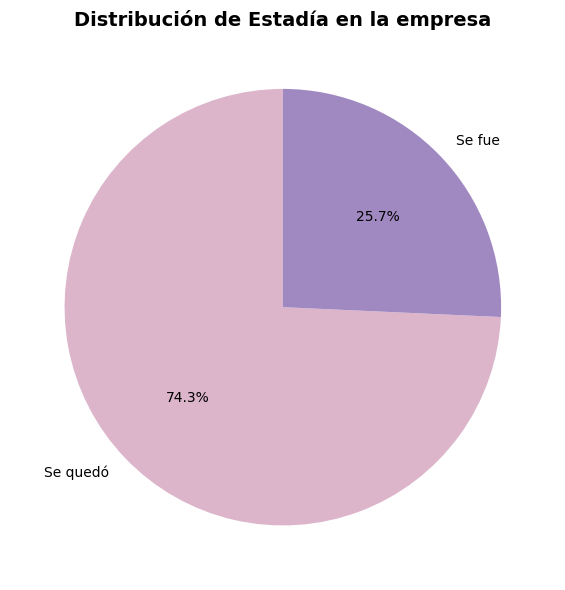

In [30]:
churn_counts = datos['estadia_empresa'].value_counts() # Correct assignment of the Series

labels = ['Se quedó', 'Se fue']

colors = ['#DCB5CA', '#A088C1']  # amarillo pastel y naranja suave

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Estadía en la empresa', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.savefig('/content/porcentaje_estadia.png', transparent=False, dpi=300, bbox_inches='tight') # Use plt.savefig to save the current figure
plt.show()

<ipython-input-31-c9277389d8d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='estadia_empresa', data=datos, palette='icefire')


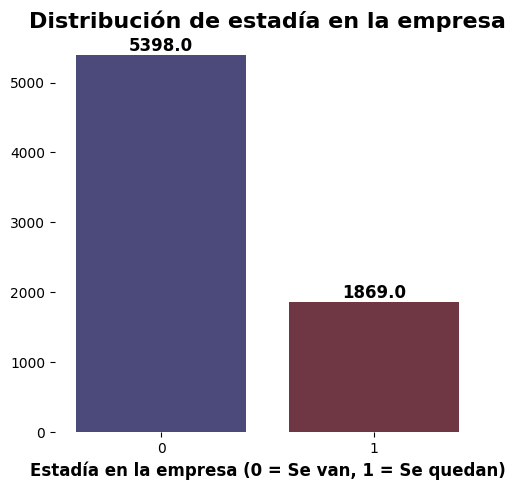

In [31]:
fig2, ax = plt.subplots(figsize=(5, 5))

ax = sns.countplot(x='estadia_empresa', data=datos, palette='icefire')

ax.set_title('Distribución de estadía en la empresa', fontsize=16, fontweight='bold')
ax.set_xlabel('Estadía en la empresa (0 = Se van, 1 = Se quedan)', fontsize=12, fontweight='bold')
ax.set_ylabel('')
ax.set_frame_on(False)
sns.despine()

total = len(datos)

for p in ax.patches:
    cantidad = p.get_height()
    total = f'{(cantidad)}'
    ax.annotate(total,
                (p.get_x() + p.get_width() / 2, cantidad),
                ha='center', va='bottom', fontsize=12, fontweight='bold', fontfamily = 'sans-serif')

plt.tight_layout()

fig2.savefig('/content/estadia.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

##Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

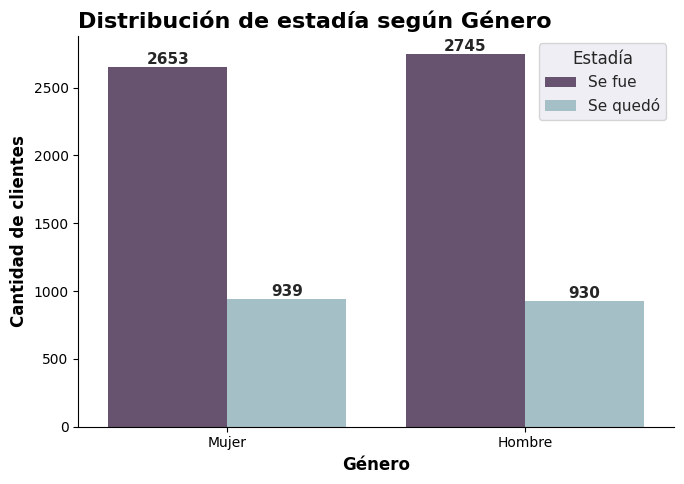

In [32]:
# GÉNERO
plt.figure(figsize=(7,5))

ax = sns.countplot(x='genero', hue='estadia_empresa', data=datos, palette=['#694D75', '#9FC2CC'])

ax.set_title('Distribución de estadía según Género', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Género', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se quedó'], title='Estadía')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/estadia_genero.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


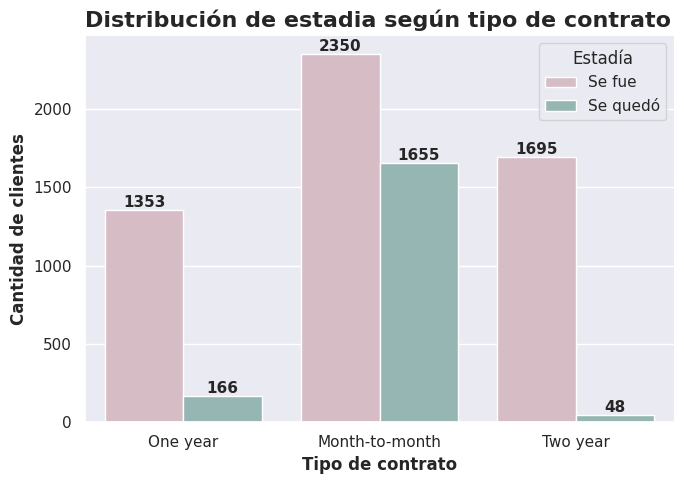

In [33]:
# TIPO DE CONTRATO
plt.figure(figsize=(7,5))

ax = sns.countplot(x='contrato', hue='estadia_empresa', data=datos, palette=['#D9B8C4', '#91BBB8'])

ax.set_title('Distribución de estadia según tipo de contrato', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Tipo de contrato', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se quedó'], title='Estadía')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/estadia_contrato.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

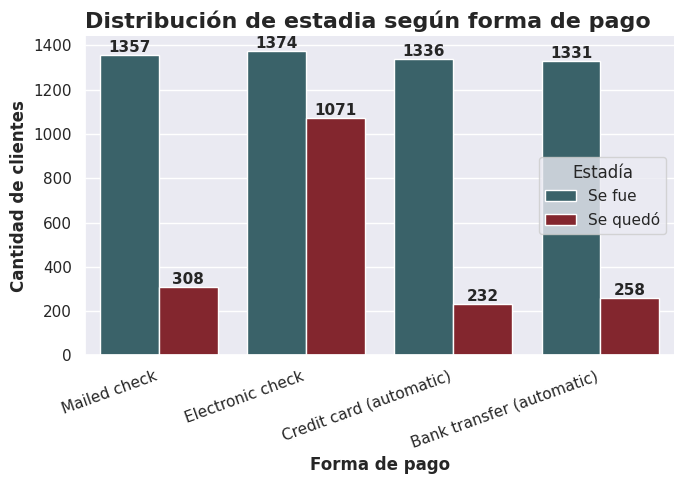

In [34]:
# MÉTODO DE PAGO
plt.figure(figsize=(7,5))

ax = sns.countplot(x='forma_pago', hue='estadia_empresa', data=datos, palette=['#326771', '#931621'])

ax.set_title('Distribución de estadia según forma de pago', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Forma de pago', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se quedó'], title='Estadía', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.xticks(rotation=20, ha='right')

plt.tight_layout()

plt.savefig('/content/estadia_formaPago.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [35]:
datos['proveedor_internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

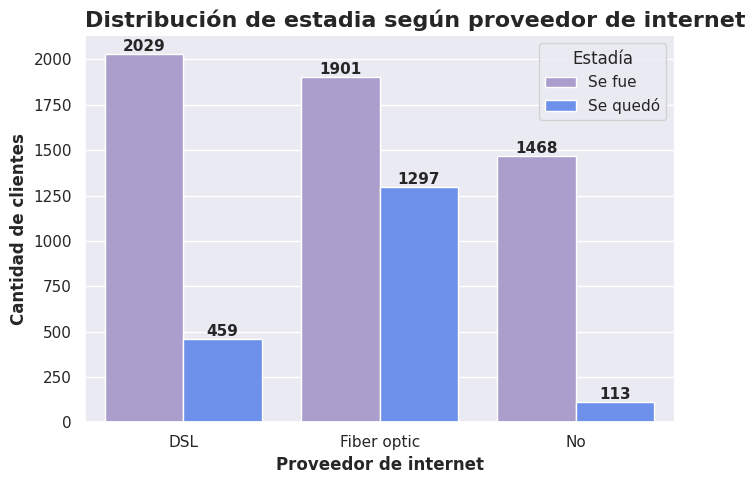

In [36]:
# proveedor_internet
plt.figure(figsize=(7,5))

ax = sns.countplot(x='proveedor_internet', hue='estadia_empresa', data=datos, palette=['#A896D4', '#5887FF'])

ax.set_title('Distribución de estadia según proveedor de internet', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Proveedor de internet', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se quedó'], title='Estadía', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('/content/estadia_proveedorIntenet.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

##Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

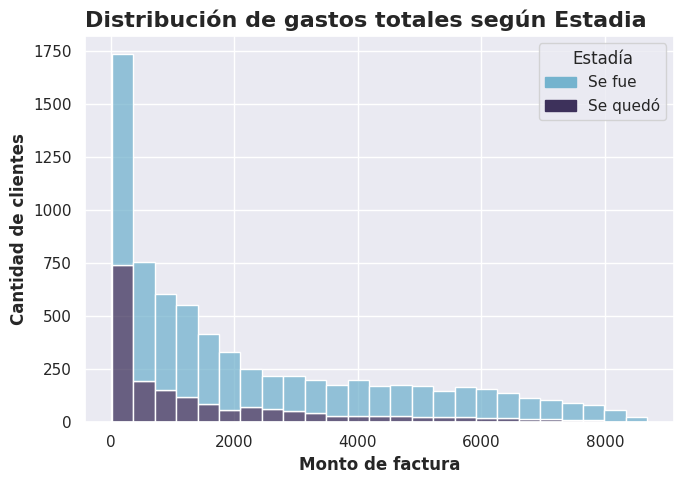

In [37]:
#GASTOS TOTALES
import matplotlib.patches as mpatches

plt.figure(figsize=(7,5))
ax = sns.histplot(data=datos, x='gastos_totales', hue='estadia_empresa', multiple='stack', palette=['#74B3CE', '#3D315B'])

ax.set_title('Distribución de gastos totales según Estadia', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Monto de factura', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')

patch_se_fue = mpatches.Patch(color='#74B3CE', label='Se fue')
patch_se_quedo = mpatches.Patch(color='#3D315B', label='Se quedó')
ax.legend(handles=[patch_se_fue, patch_se_quedo], title='Estadía', loc='best')

plt.tight_layout()

plt.savefig('/content/estadia_gastosTotales.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()



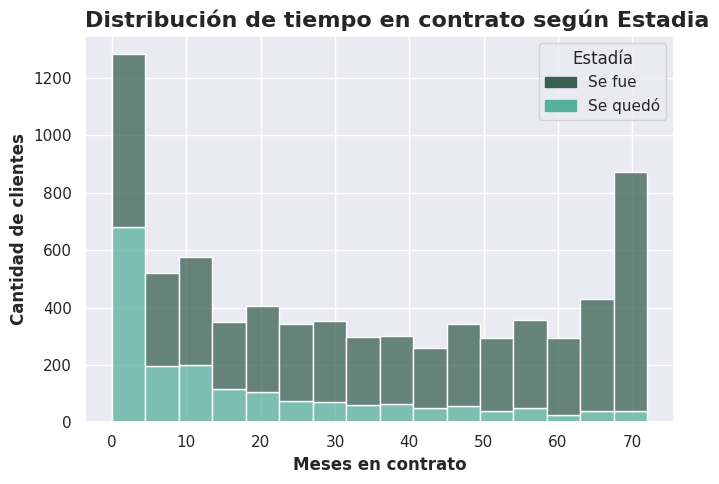

In [38]:
#TIEMPO DE CONTRATO
import matplotlib.patches as mpatches

plt.figure(figsize=(7,5))
ax = sns.histplot(data=datos, x='meses_contrato', hue='estadia_empresa', multiple='stack', palette=['#386150', '#58B09C'])

ax.set_title('Distribución de tiempo en contrato según Estadia', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Meses en contrato', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')

patch_se_fue = mpatches.Patch(color='#386150', label='Se fue')
patch_se_quedo = mpatches.Patch(color='#58B09C', label='Se quedó')
ax.legend(handles=[patch_se_fue, patch_se_quedo], title='Estadía', loc='best')

plt.tight_layout()
plt.savefig('/content/estadia_tiempoContrato.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


In [39]:
columna_dependientes = datos[['dependientes', 'estadia_empresa']]
columna_dependientes['dependientes'] = columna_dependientes['dependientes'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


<ipython-input-39-3fdc7ecc296e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columna_dependientes['dependientes'] = columna_dependientes['dependientes'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


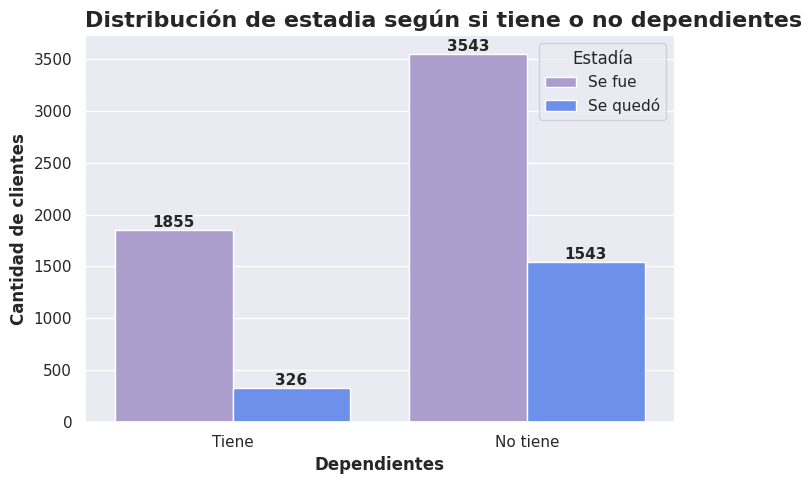

In [40]:
# DEPENDIENTES
plt.figure(figsize=(7,5))

ax = sns.countplot(x='dependientes', hue='estadia_empresa', data=columna_dependientes, palette=['#A896D4', '#5887FF'])

ax.set_title('Distribución de estadia según si tiene o no dependientes', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Dependientes', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se quedó'], title='Estadía', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('/content/estadia_dependientes.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [41]:
columna_multiples = datos[['lineas_multiples', 'estadia_empresa']]
columna_multiples['lineas_multiples'] = columna_multiples['lineas_multiples'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


<ipython-input-41-cf647892f87e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columna_multiples['lineas_multiples'] = columna_multiples['lineas_multiples'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')


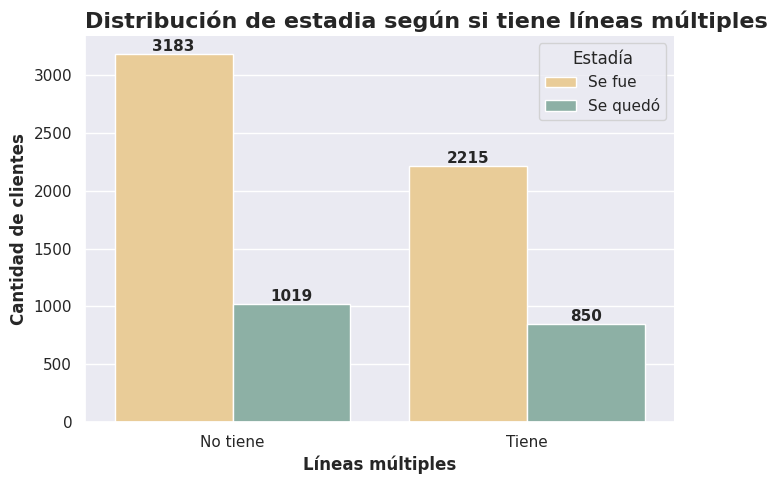

In [42]:
# LÍNEAS MULTIPLES
plt.figure(figsize=(7,5))

ax = sns.countplot(x='lineas_multiples', hue='estadia_empresa', data=columna_multiples, palette=['#F7D08A', '#87B6A7'])

ax.set_title('Distribución de estadia según si tiene líneas múltiples', loc='left', fontsize=16, fontweight='bold')
sns.set_theme(style='darkgrid')

plt.xlabel('Líneas múltiples', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de clientes', fontsize=12, fontweight='bold')
sns.despine()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Se fue', 'Se quedó'], title='Estadía', loc='best')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('/content/estadia_lineasMultiples.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [43]:
columnas_adicionales = datos[['estadia_empresa', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico']].copy()

for col in ['seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico']:
    columnas_adicionales[col] = columnas_adicionales[col].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')

servicios_melted = pd.melt(columnas_adicionales,
                           id_vars='estadia_empresa',
                           var_name='servicio',
                           value_name='estado')

servicios_melted['estadia_empresa'] = servicios_melted['estadia_empresa'].map({0: 'Se fue', 1: 'Se quedó'})



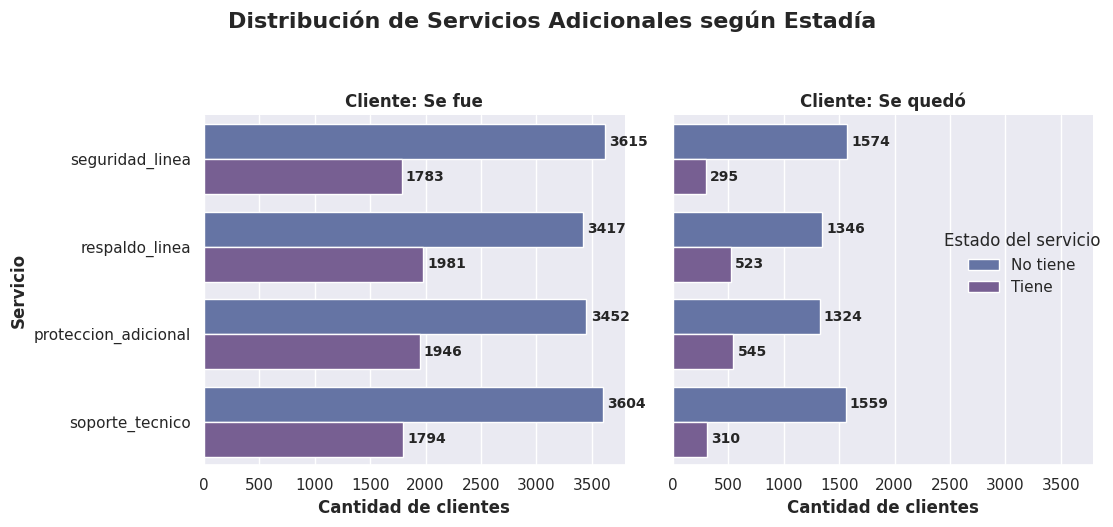

In [44]:
ax = sns.catplot(
    data=servicios_melted,
    kind='count',
    y='servicio', hue='estado',
    col='estadia_empresa',
    palette=['#5A6FAF', '#76569B'],
    height=5, aspect=1
)

ax.set_titles('Cliente: {col_name}', fontweight='bold')
ax.set_axis_labels('Cantidad de clientes', 'Servicio', fontweight='bold')
ax._legend.set_title('Estado del servicio')

plt.suptitle('Distribución de Servicios Adicionales según Estadía',
             fontsize=16, fontweight='bold', y=1.05)

for a in ax.axes.flat:  # Recorre cada gráfico (columna)
    for container in a.containers:  # Cada grupo de barras (por hue)
        a.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/estadia_servicios_adicionales.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


## ¡Extra! Análisis de correlación entre variables

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

- La relación entre la cuenta diaria y la evasión.
- Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

###La relación entre la cuenta diaria y la evasión.

In [56]:
columnas = datos.columns
columnas

Index(['clientesID', 'estadia_empresa', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefono',
       'lineas_multiples', 'proveedor_internet', 'seguridad_linea',
       'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico',
       'suscripcion_tv', 'suscripcion_peliculas', 'contrato',
       'facturacion_electronica', 'forma_pago', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias'],
      dtype='object')

In [57]:
columnas = datos.columns
correlacion = datos[['estadia_empresa', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefono',
       'lineas_multiples', 'seguridad_linea',
       'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico',
       'suscripcion_tv', 'suscripcion_peliculas',
       'facturacion_electronica', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias']].corr()

In [58]:
columns_to_drop = ['adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefono',
       'lineas_multiples', 'seguridad_linea',
       'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico',
       'suscripcion_tv', 'suscripcion_peliculas',
       'facturacion_electronica', 'gastos_mensuales',
       'gastos_totales', 'cuentas_diarias']

correlacion = correlacion.drop(columns=columns_to_drop, axis = 0)
correlacion

,estadia_empresa
estadia_empresa,1.000000
adulto_mayor,0.146733
pareja,-0.148546
dependientes,-0.161384
meses_contrato,-0.344079
servicio_telefono,0.012571
lineas_multiples,0.039343
seguridad_linea,-0.166828
respaldo_linea,-0.080163
proteccion_adicional,-0.063452


Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

In [48]:
servicios = datos[['servicio_telefono', 'lineas_multiples', 'seguridad_linea', 'respaldo_linea', 'proteccion_adicional', 'soporte_tecnico', 'suscripcion_tv', 'suscripcion_peliculas', 'estadia_empresa']]

In [49]:
servicios['total_servicios'] = servicios.drop(columns='estadia_empresa').sum(axis=1)


<ipython-input-49-d727197ae38f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  servicios['total_servicios'] = servicios.drop(columns='estadia_empresa').sum(axis=1)


In [60]:
correlacion_servicios = servicios[['total_servicios', 'estadia_empresa']].corr()
print(correlacion_servicios)


                 total_servicios  estadia_empresa
total_servicios         1.000000        -0.064642
estadia_empresa        -0.064642         1.000000


Cercano a 1: más servicios → más probabilidad de quedarse.

Cercano a -1: más servicios → más probabilidad de irse.

Cercano a 0: no hay relación lineal clara.

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

## **Introducción**

La evasión de clientes es un tema serio, son los que le dan vida a la compañía, por lo que es de vital importancia conocer las razones principales por las que han decidido abandonar la empresa, o en caso de no saberlas, observar en las bases de datos que factores los hacen quedarse y cuáles irse.

El objetivo de esta manipulación y transformación de datos es extraer información valiosa que sirva para analizar las razones principales por las que los clientes han decidido dejar la empresa, todo esto con el fin de que el análisis sirve de guía para que el equipo de DataSciencia cree modelos predictivos y desarrolle estrategias que reduzcan la evasión de clientes

 ## **Limpieza y Tratamiento de Datos**

Los pasos que se realizaron para la limpieza y tratamiento de los datos fueron:
1. **Extracción**: Se descargaron los datos directamente desde la API, en base al link de GitHub se pudo traer los datos y convertirlos en DataFrame de pandas.

2. **Transformación**: Se exploraron el conjunto de datos, se analizaron las columnas, su significado y el tipo de dato que tenían, se comprobaron que no hubiera incoherencias y se manejaron las que se encontraron. Posteriormente se creo la columna de cuentas diarias y se estandarizaron y transformaron los datos para un análisis más sencillo.

3. **Carga y análisis**: Se hizo un análisis descriptivo de los datos y se crearon gráficos sobre como se distribuye la evasión de los clientes y como este se relaciona con las demás categorias que se consideraron relevantes.



## **Análisis Exploratorio de Datos** : Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

### **Estadia en la empresa**

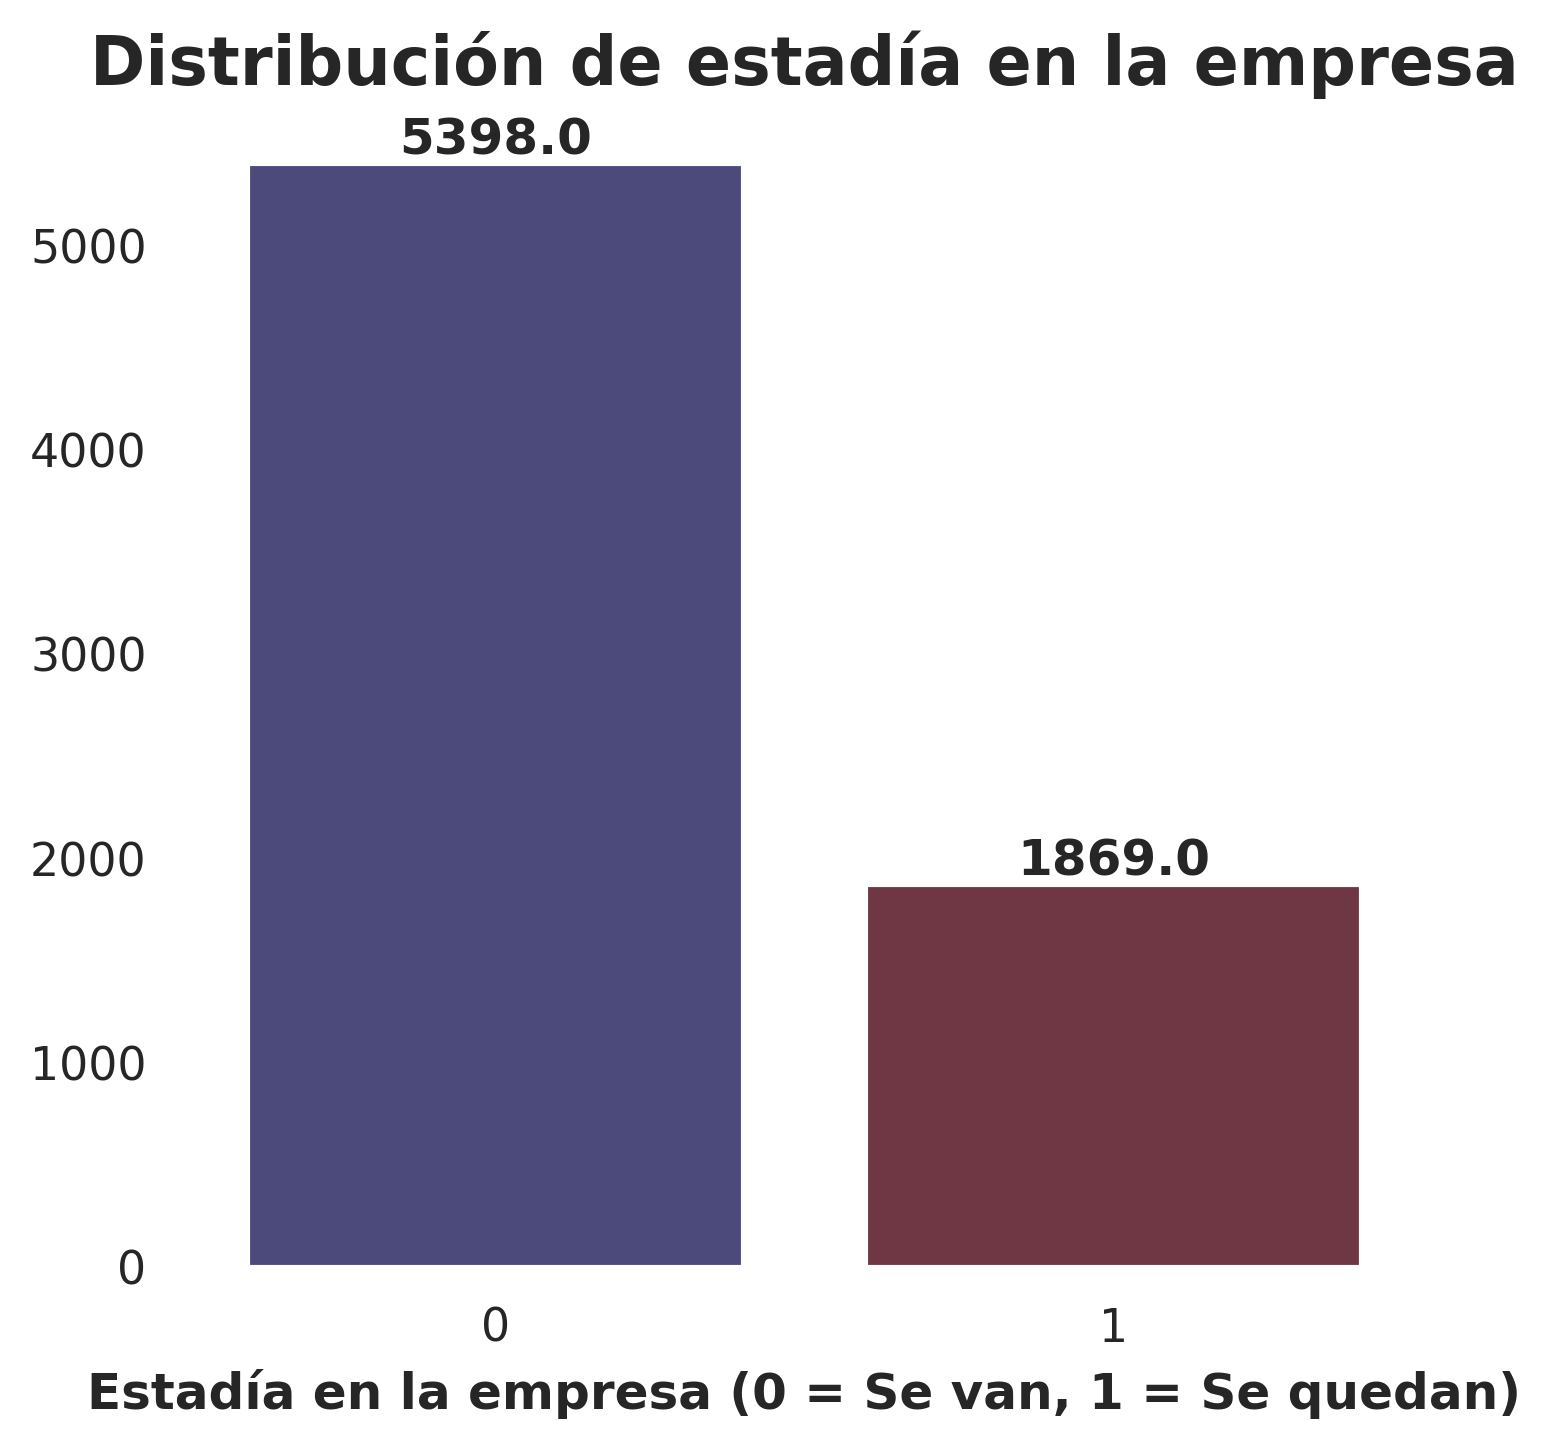

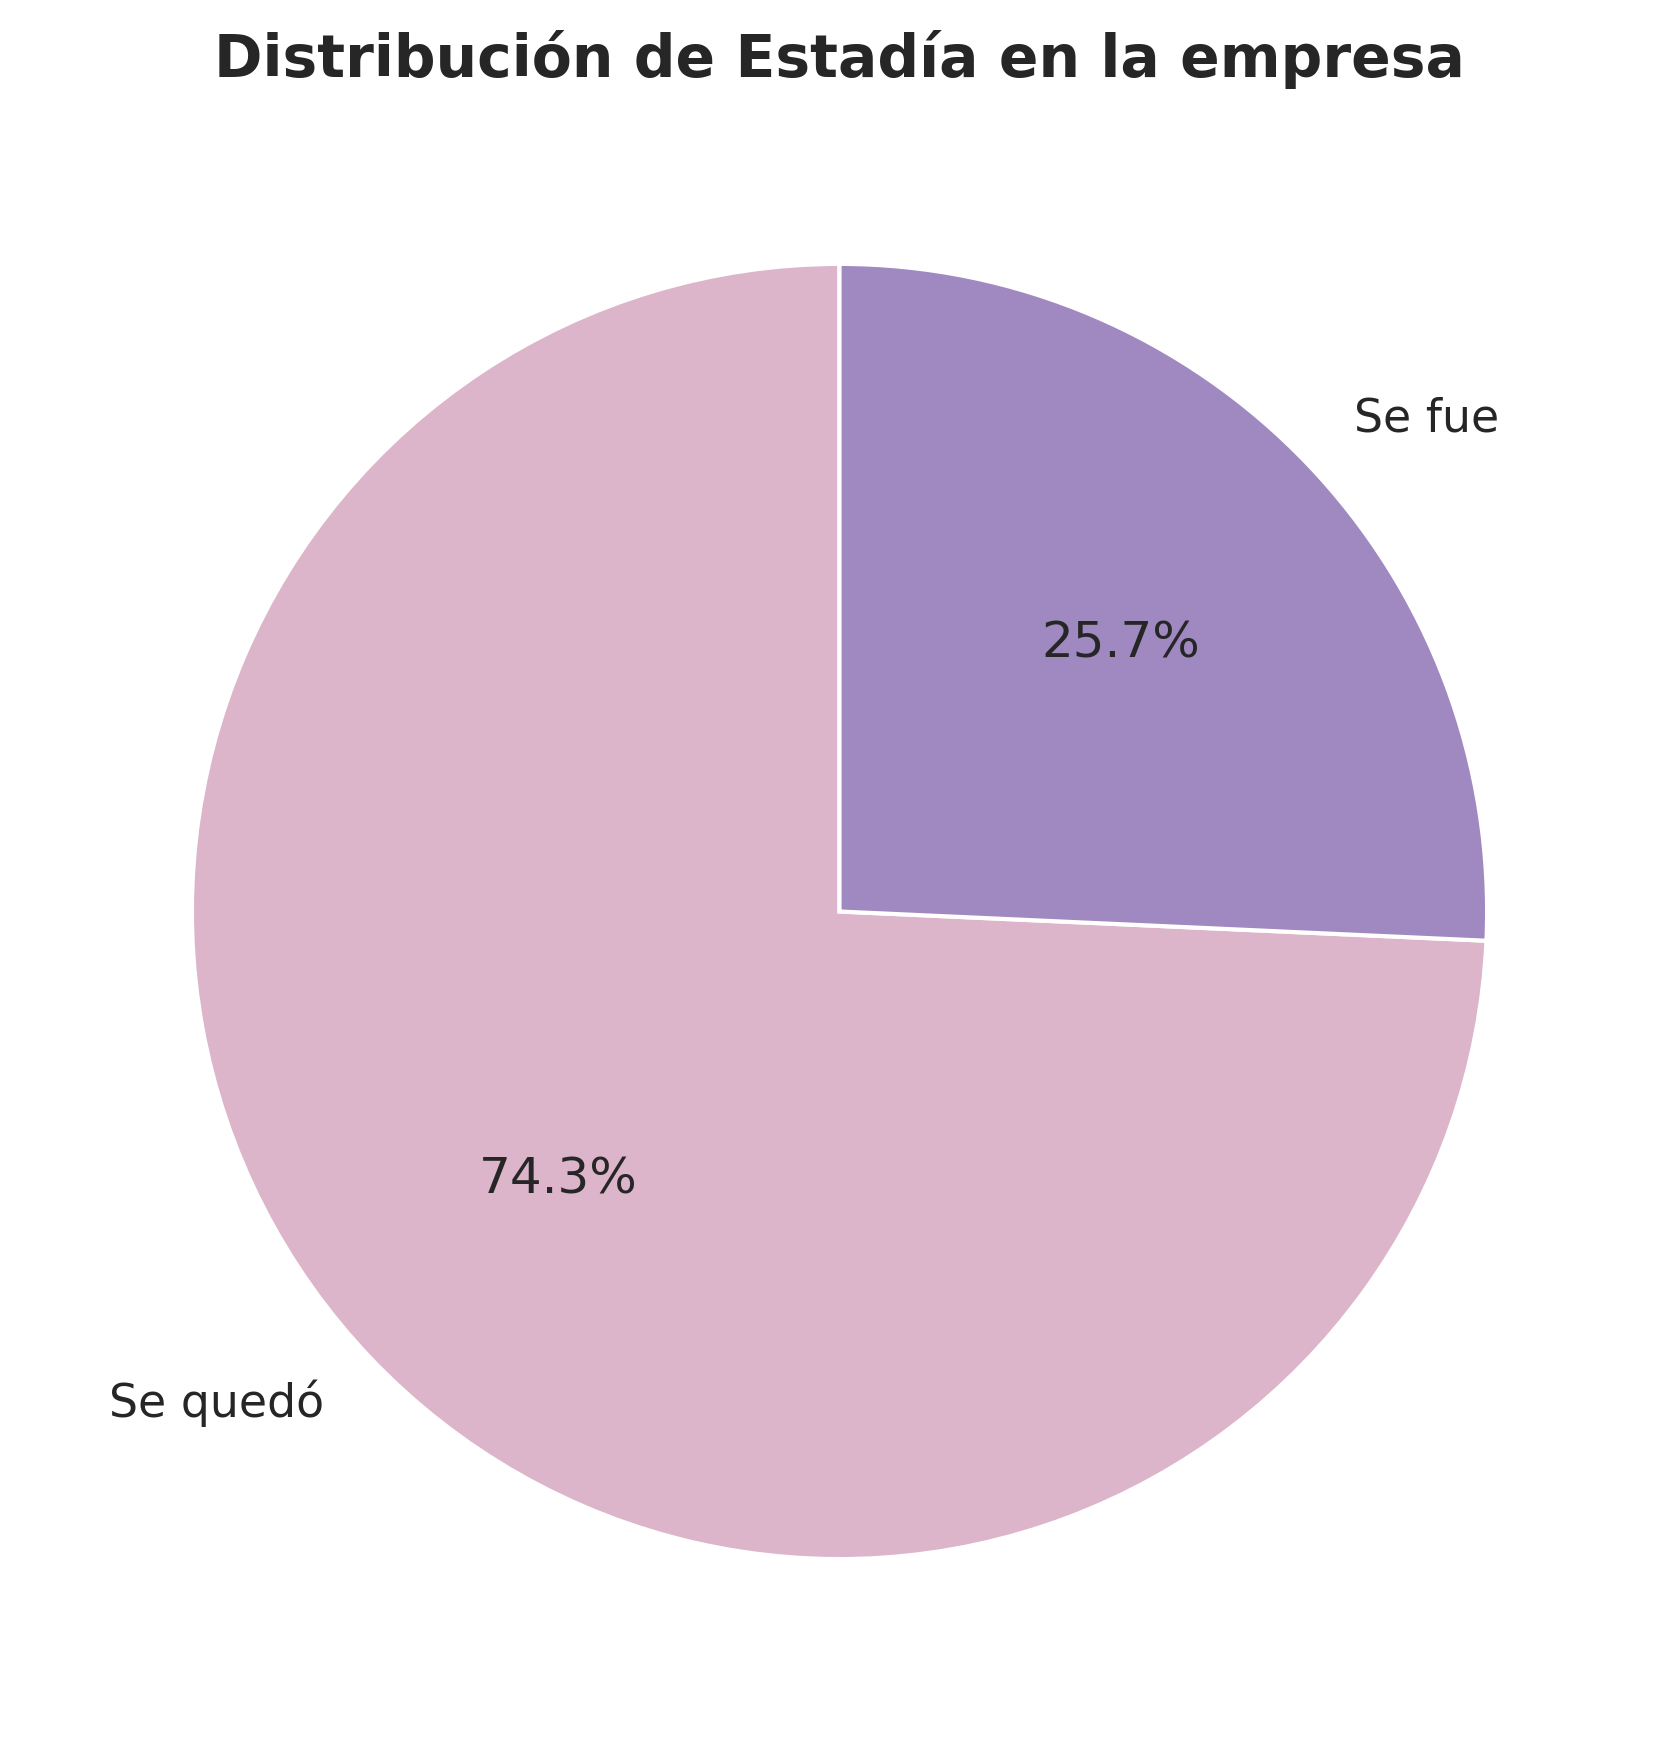

El análisis demuestra que solo poco más de un cuarto de los clientes se quedan, lo que demuestra que la preocupación por el abandono excesivo de clientes es real, y de que es de vital importancia descubrir que lo desencadena.

### **Estadía de la empresa frente a otras categorias**

#### **- Género**

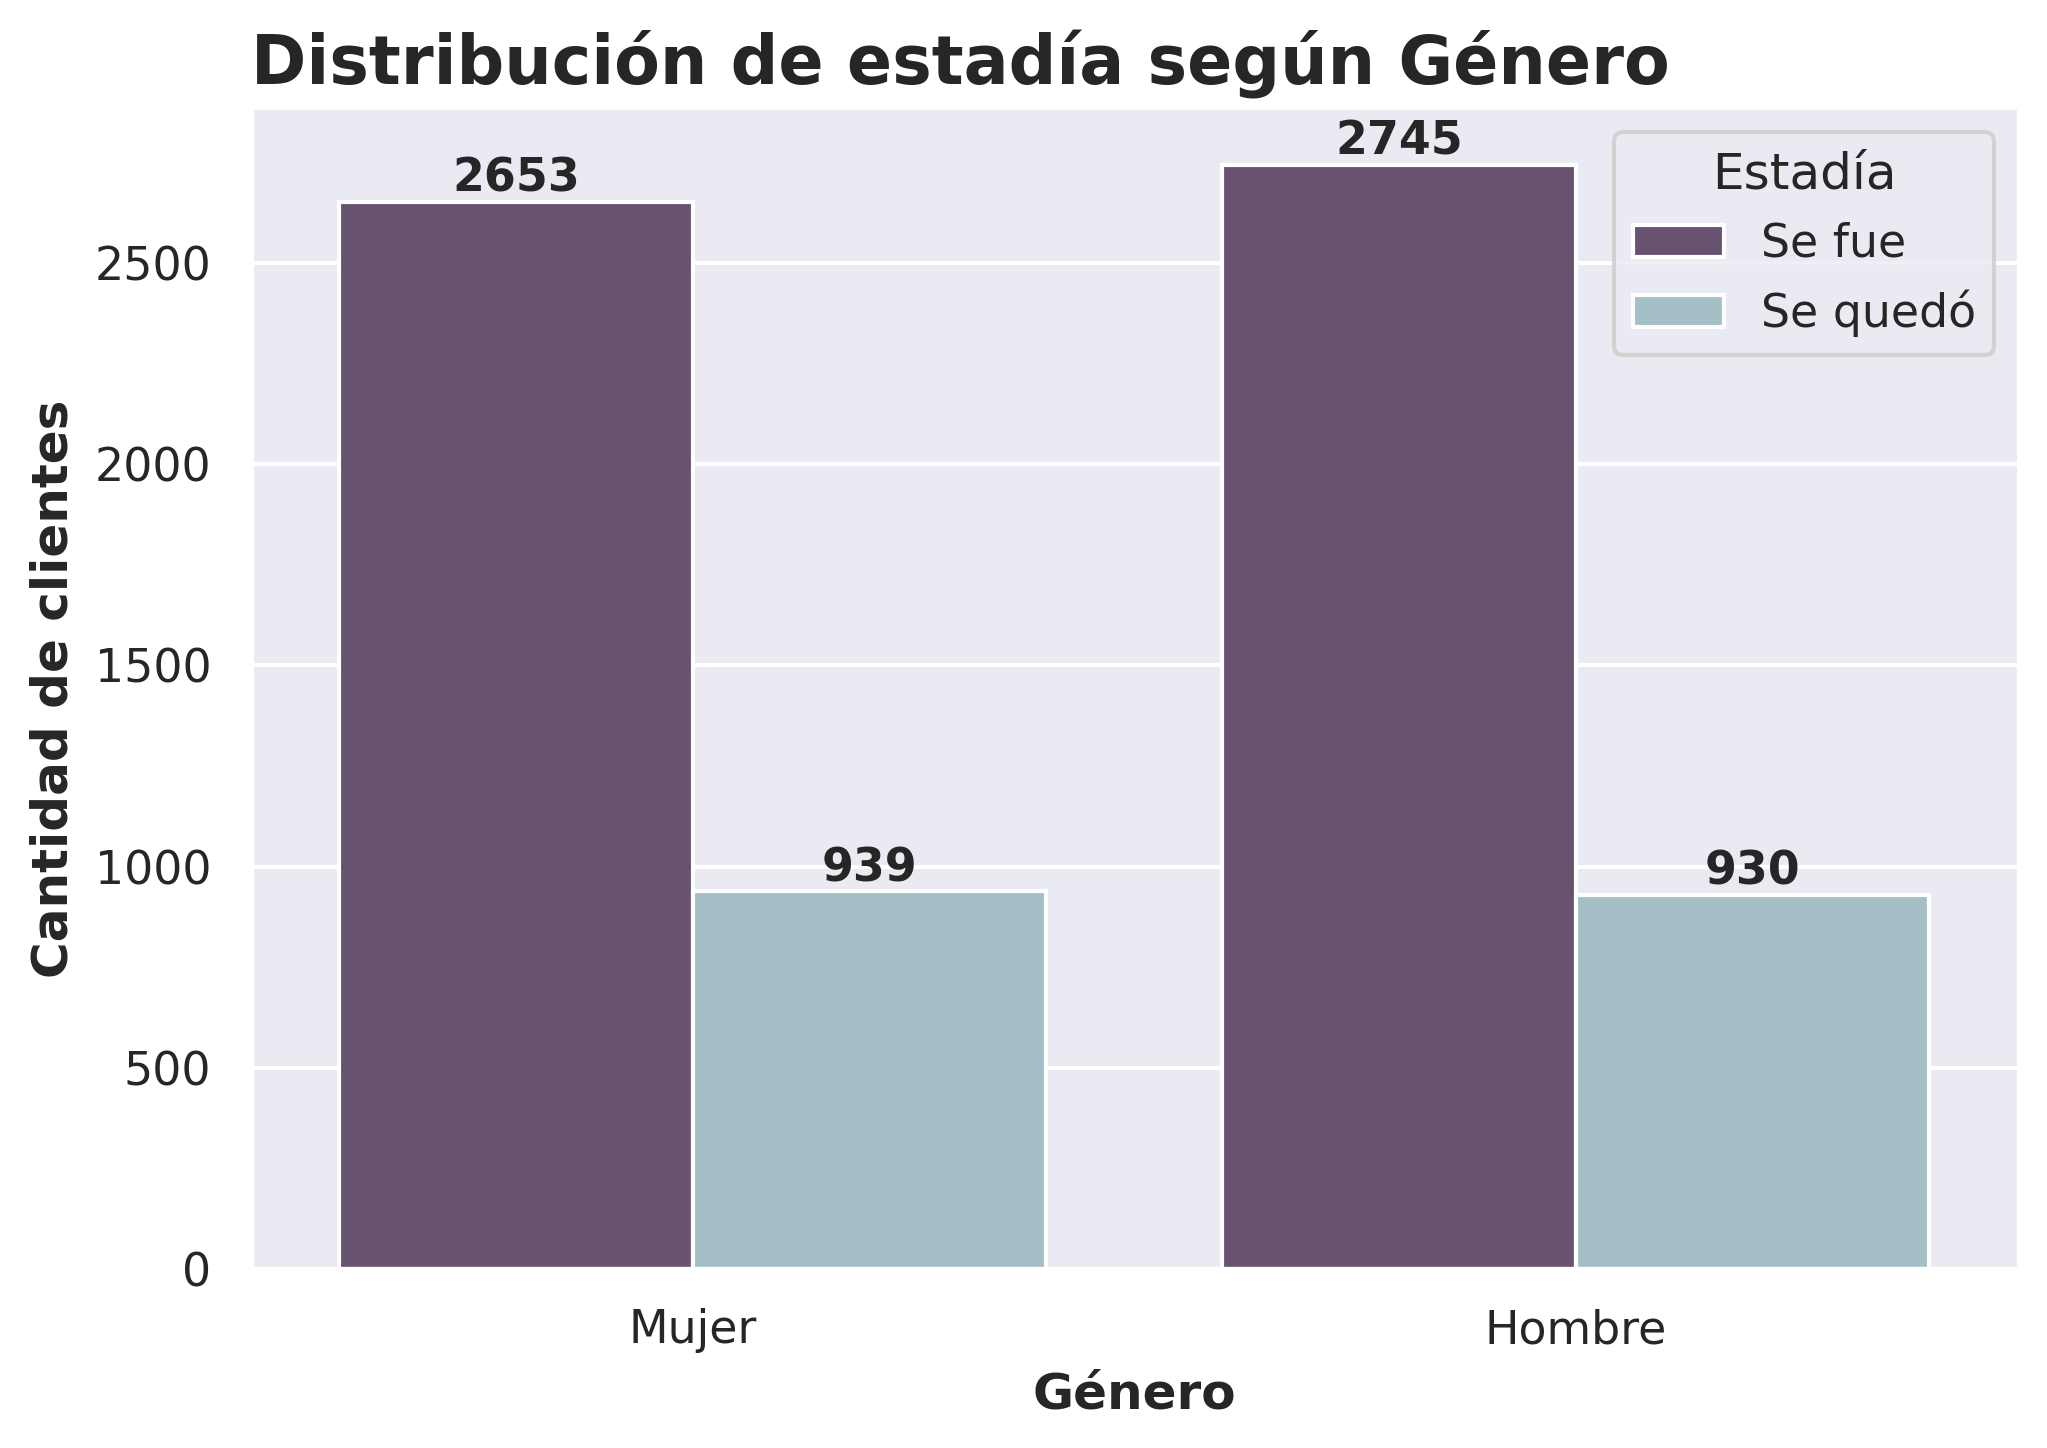

Los datos demuestran que no hay una diferencia significativa entre los dos generos que pueda mostrar un factor decisivo, lo que puede considerarse una virtud de que no se está marginando ni olvidando las necesidades particulares de un género, por otro lado hay que anotar la pequeña diferencia de los hombres se van más.

#### **- Tipo de contrato**

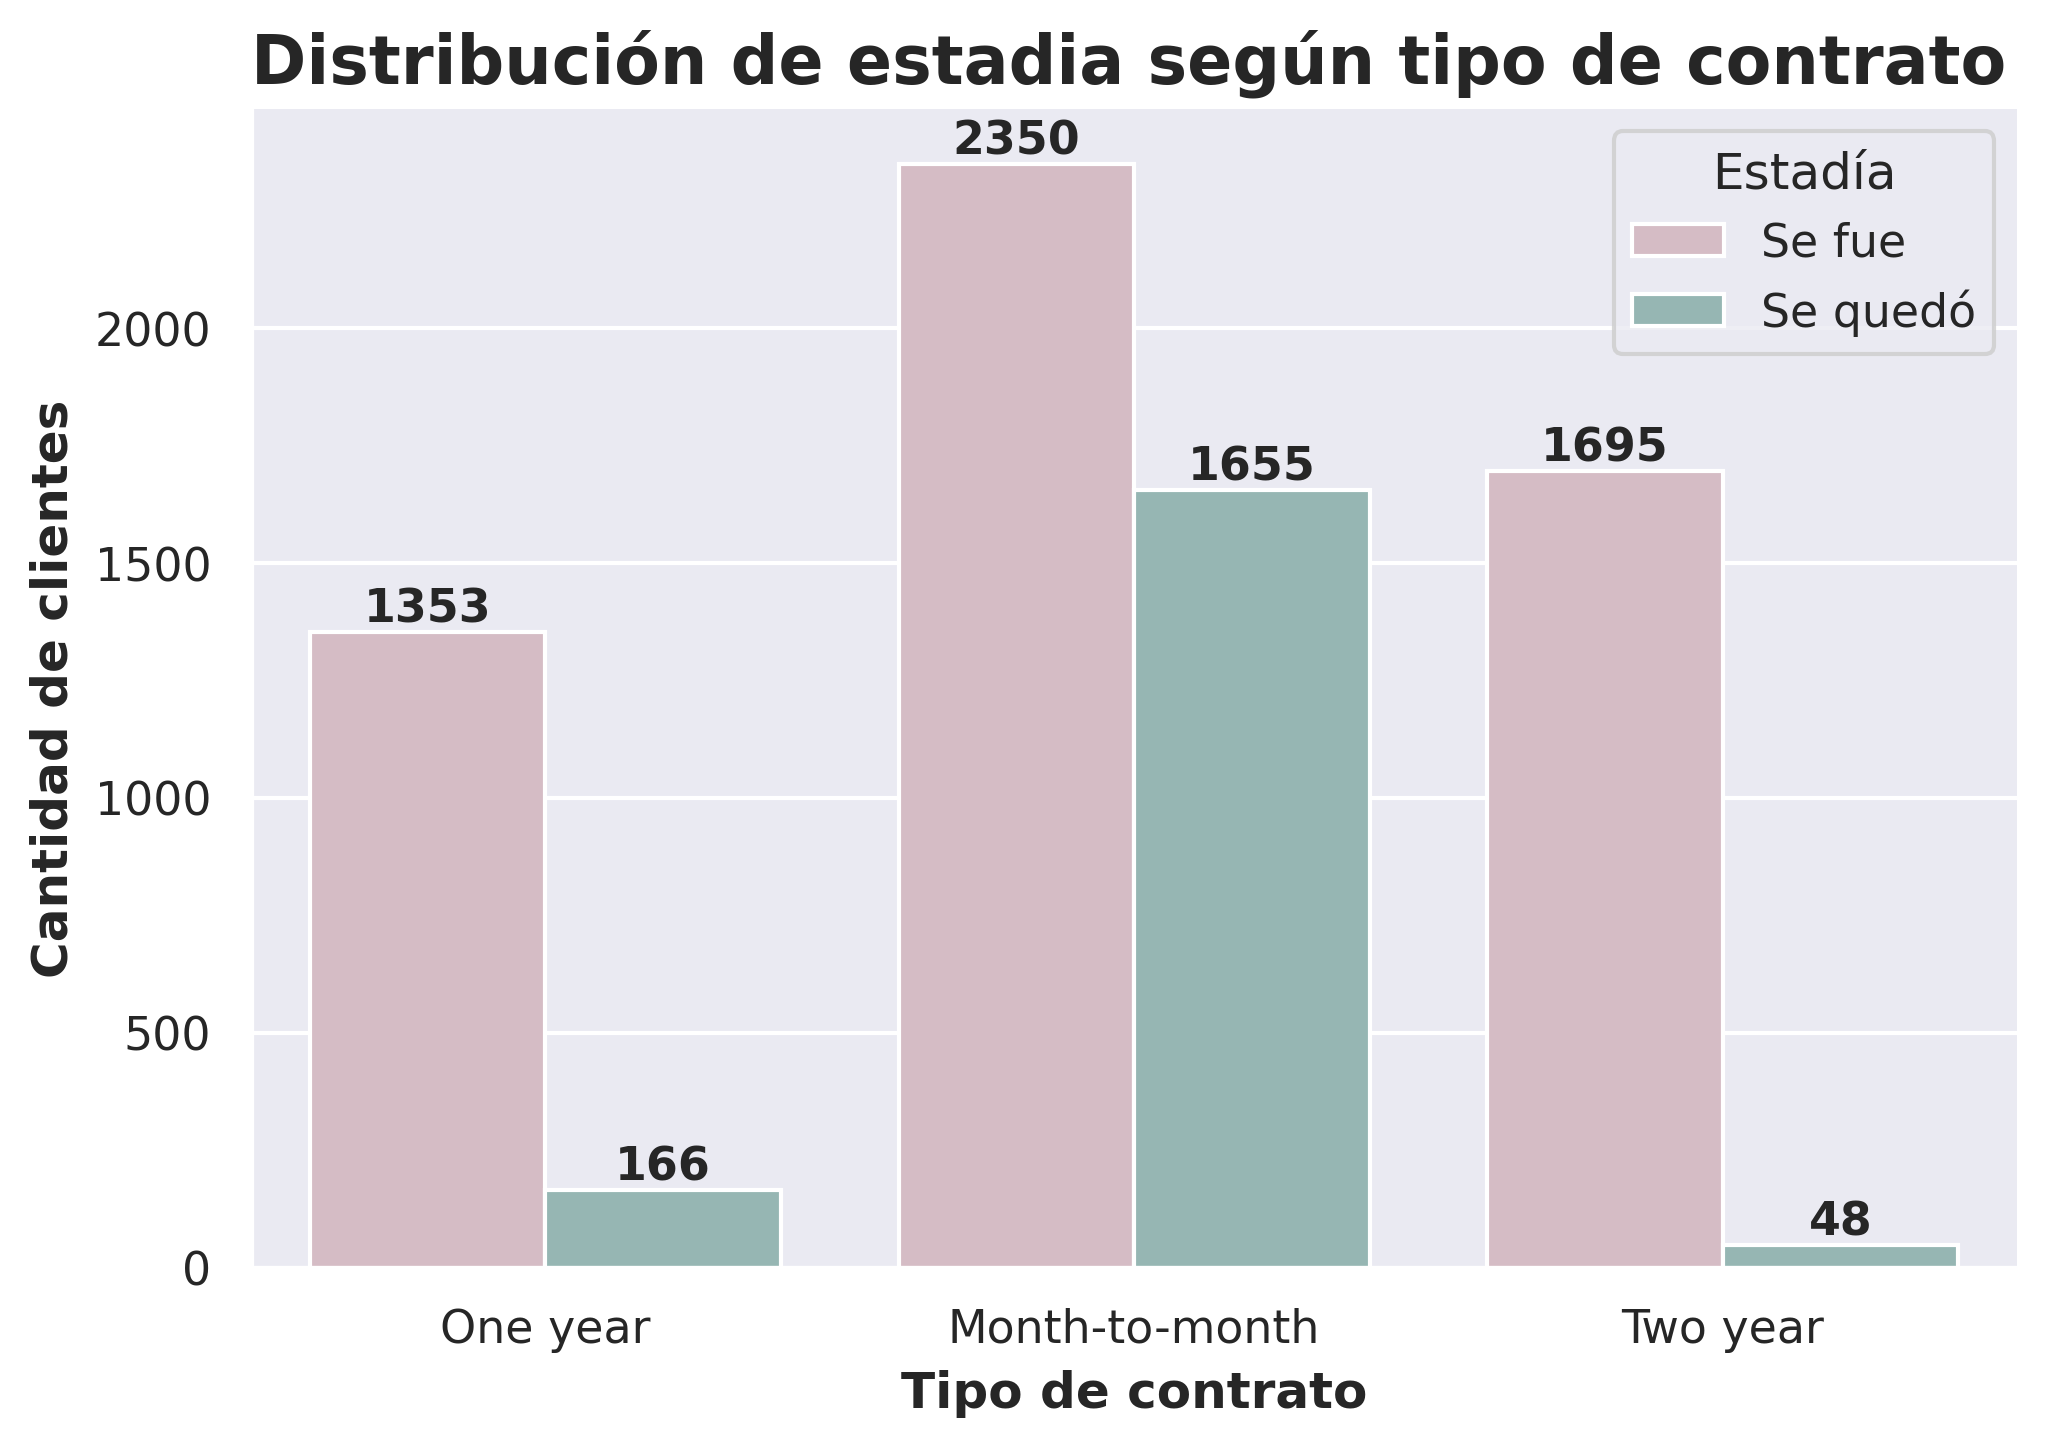

Los datos muestran que los contratos que hay más son los de mes a mes, además que son con los que mayores se quedan los clientes. Mientras que los de un año y dos años son los que menos se quedan, demostrando que al ser tan largos puede afectar al compromiso de los clientes con la empresa.

Una propuesta podría ser la integración de contratos con periodos intermedios, o caso de no ser beneficiosos, eliminar los contratos largos o solo ofrecerlos a clientes seleccionados.

#### **- Forma de pago**

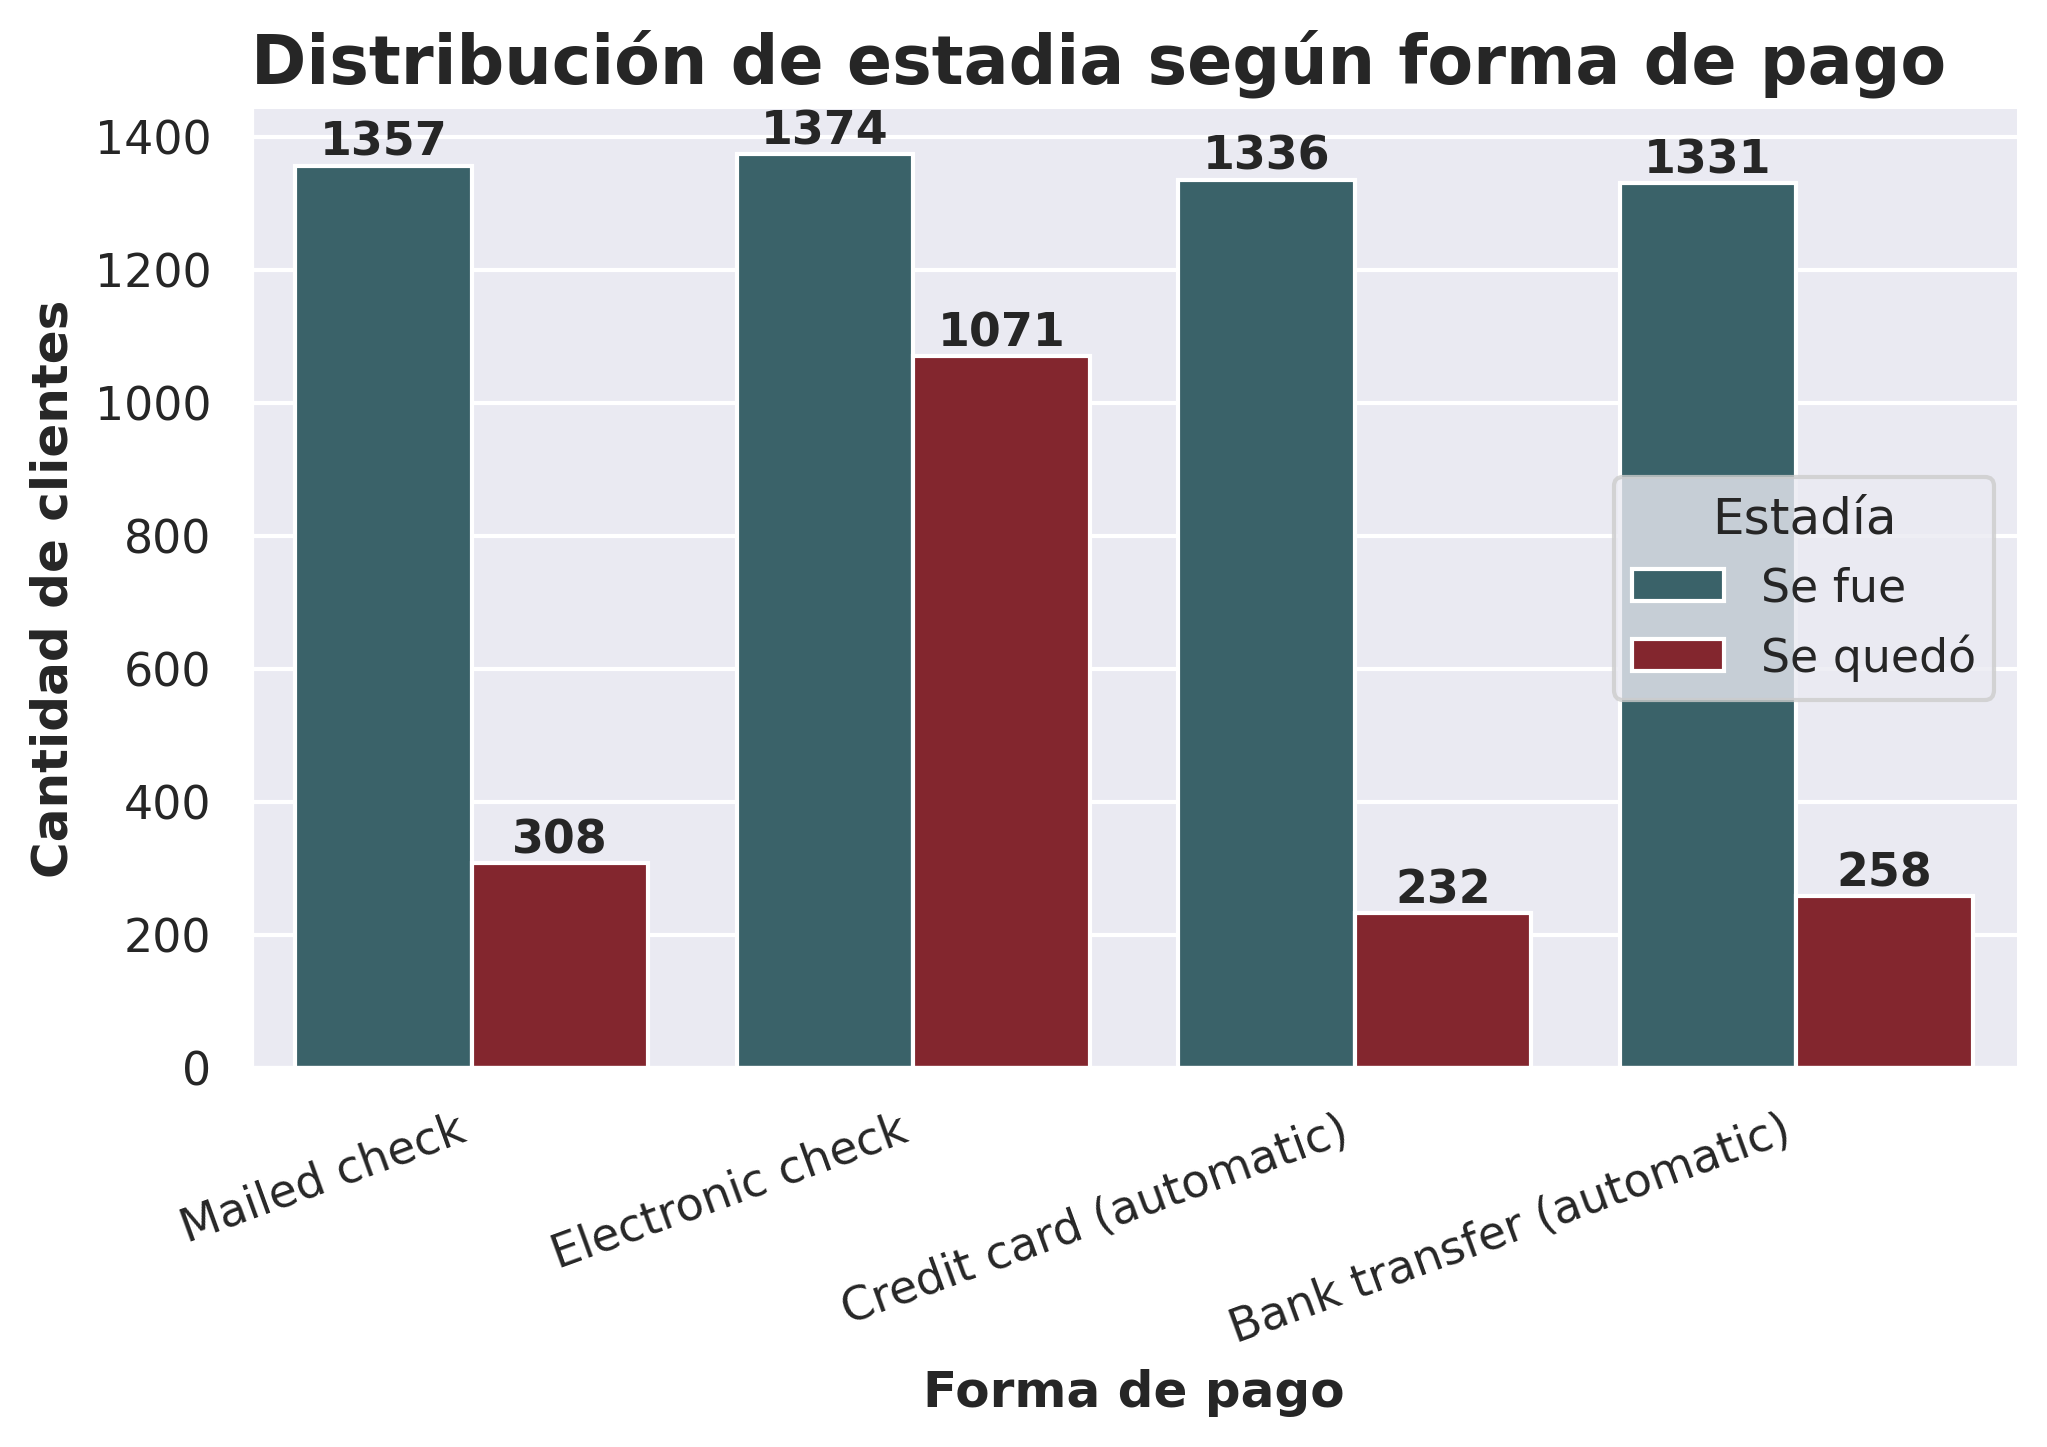

La gráfica demuestra que los clientes que mayores se quedan son los que pagan de manera electrónica, mientras que los que más se van son los que pagan de manera automática, como lo son por tarjeta de crédito y por transferencia bancaria, siendo muy seguidos de cerca por los que pagan por correo.

Para este punto propongo investigacion más profunda con respecto a estos clientes para analizar la raíz de que no les guste esta forma de pago y de que otras maneras serían más beneficios a la hora de la cobranza.

#### **- Proveedor de internet**

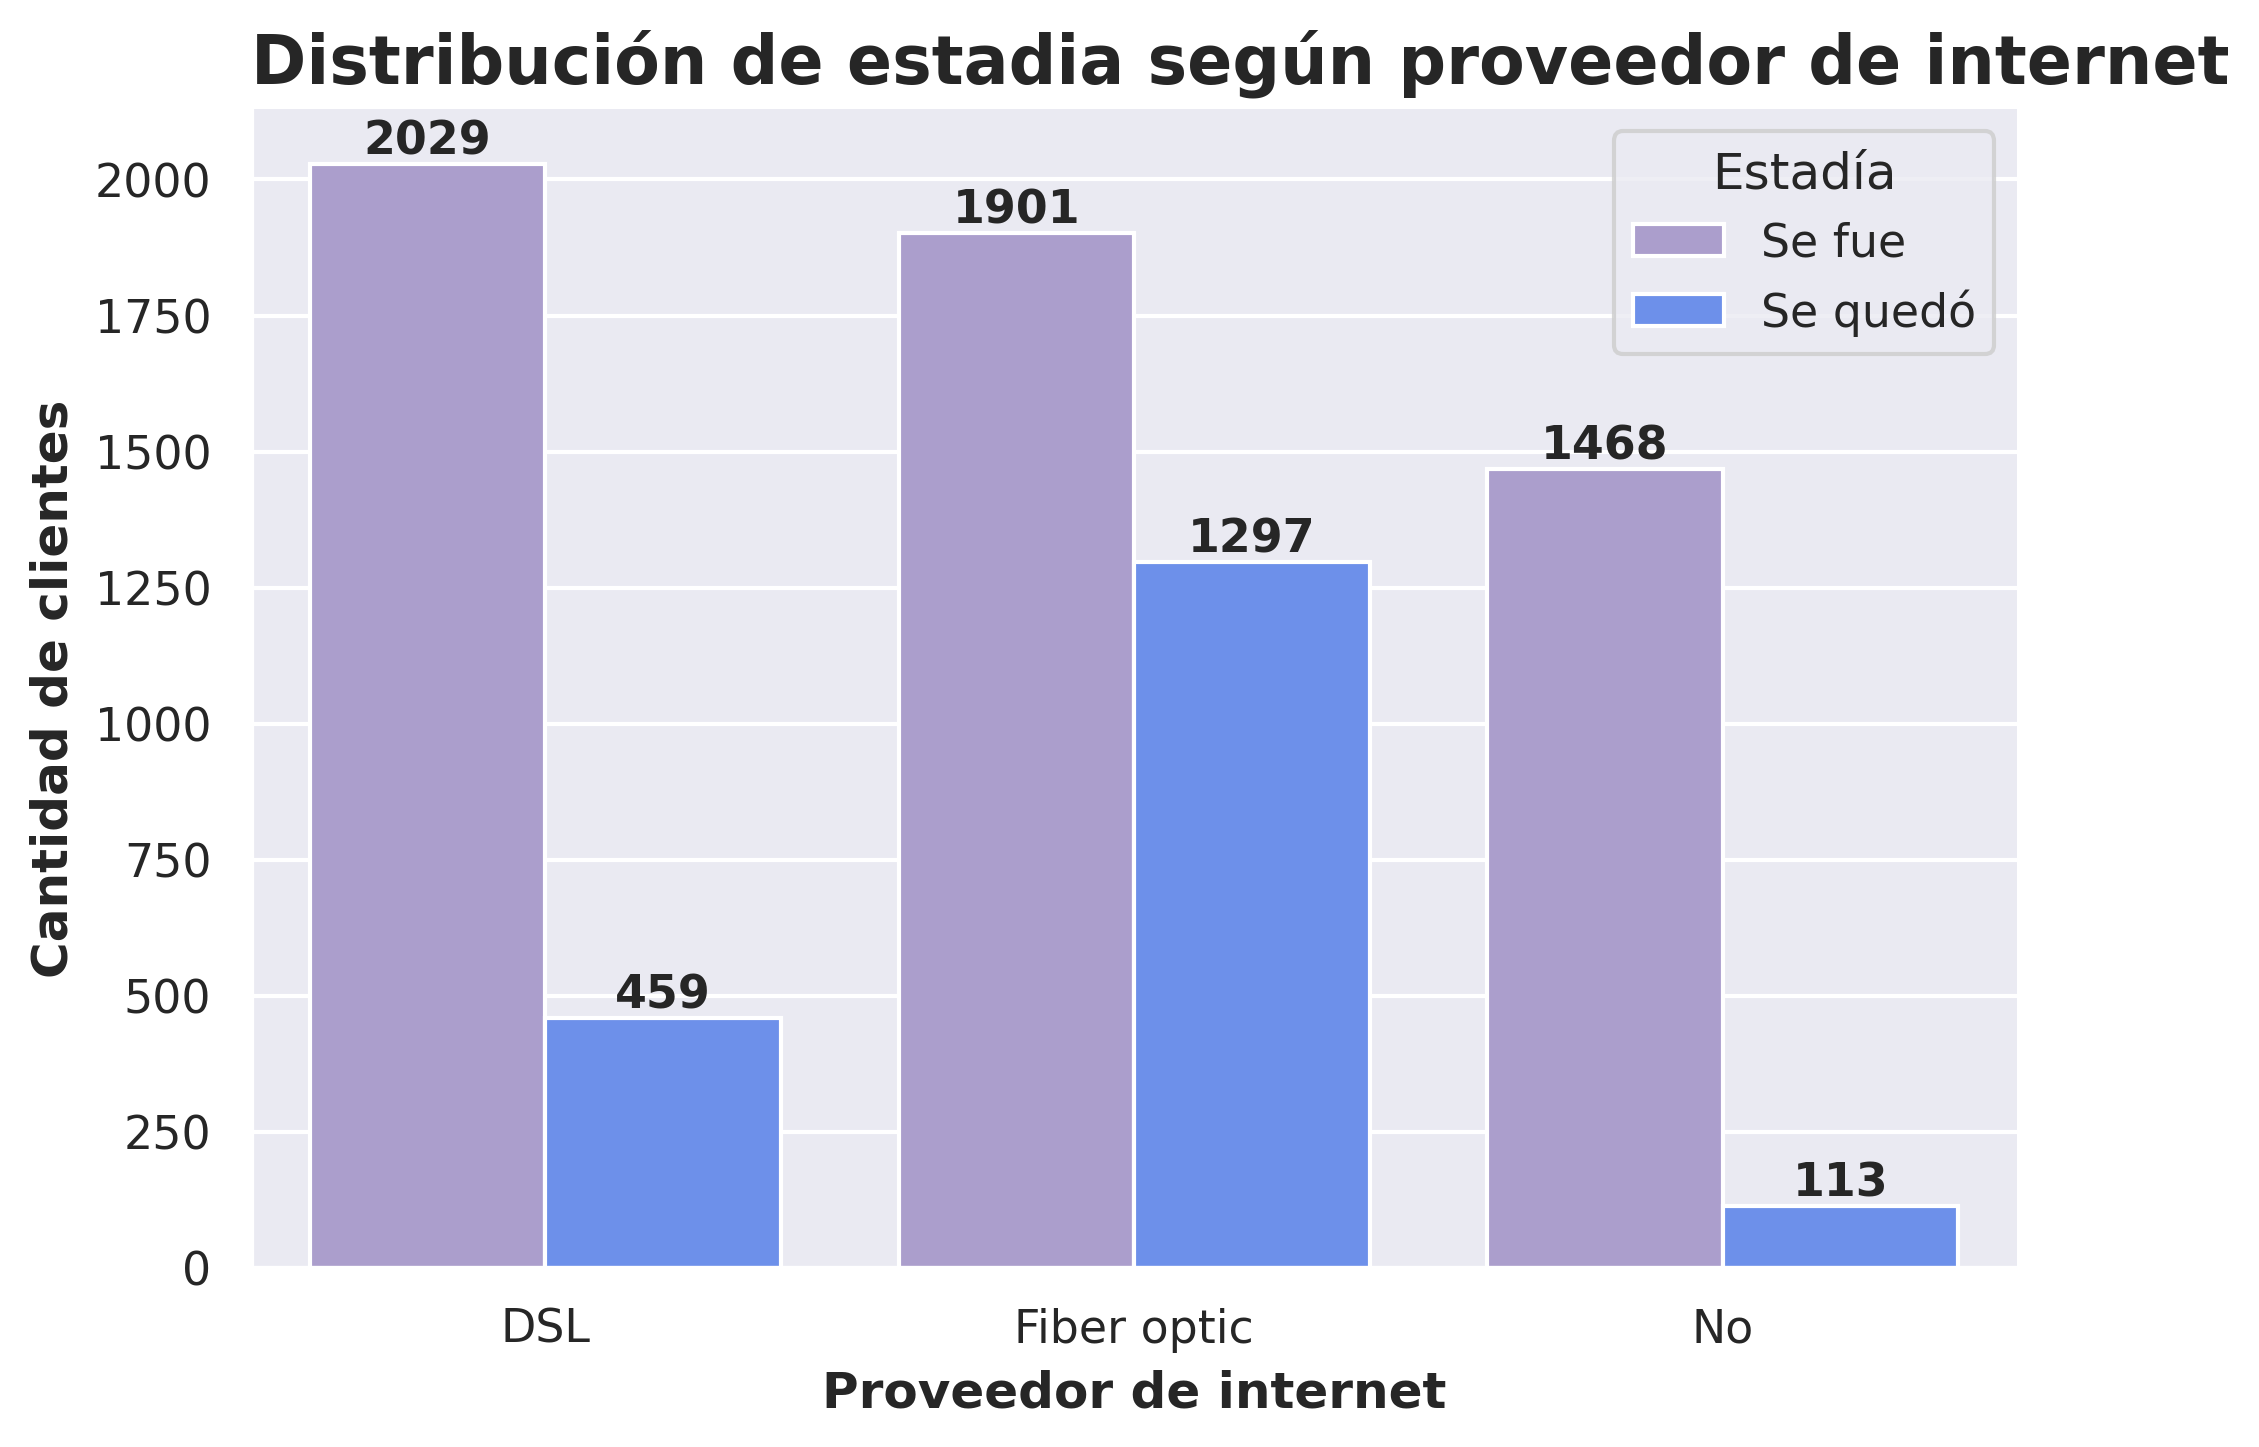

En este gráfico podemos observar que los que menos se quedaron, fueron los que tienen fibra optica, mientras que los que no tienen o cuentan con DSL son los que más se fueron.

Propongo un análisis más profundo de porque los clientes prefieren la fibra óptima y como esta se les puede proporcionar a más clientes.

#### **- Líneas múltiples**

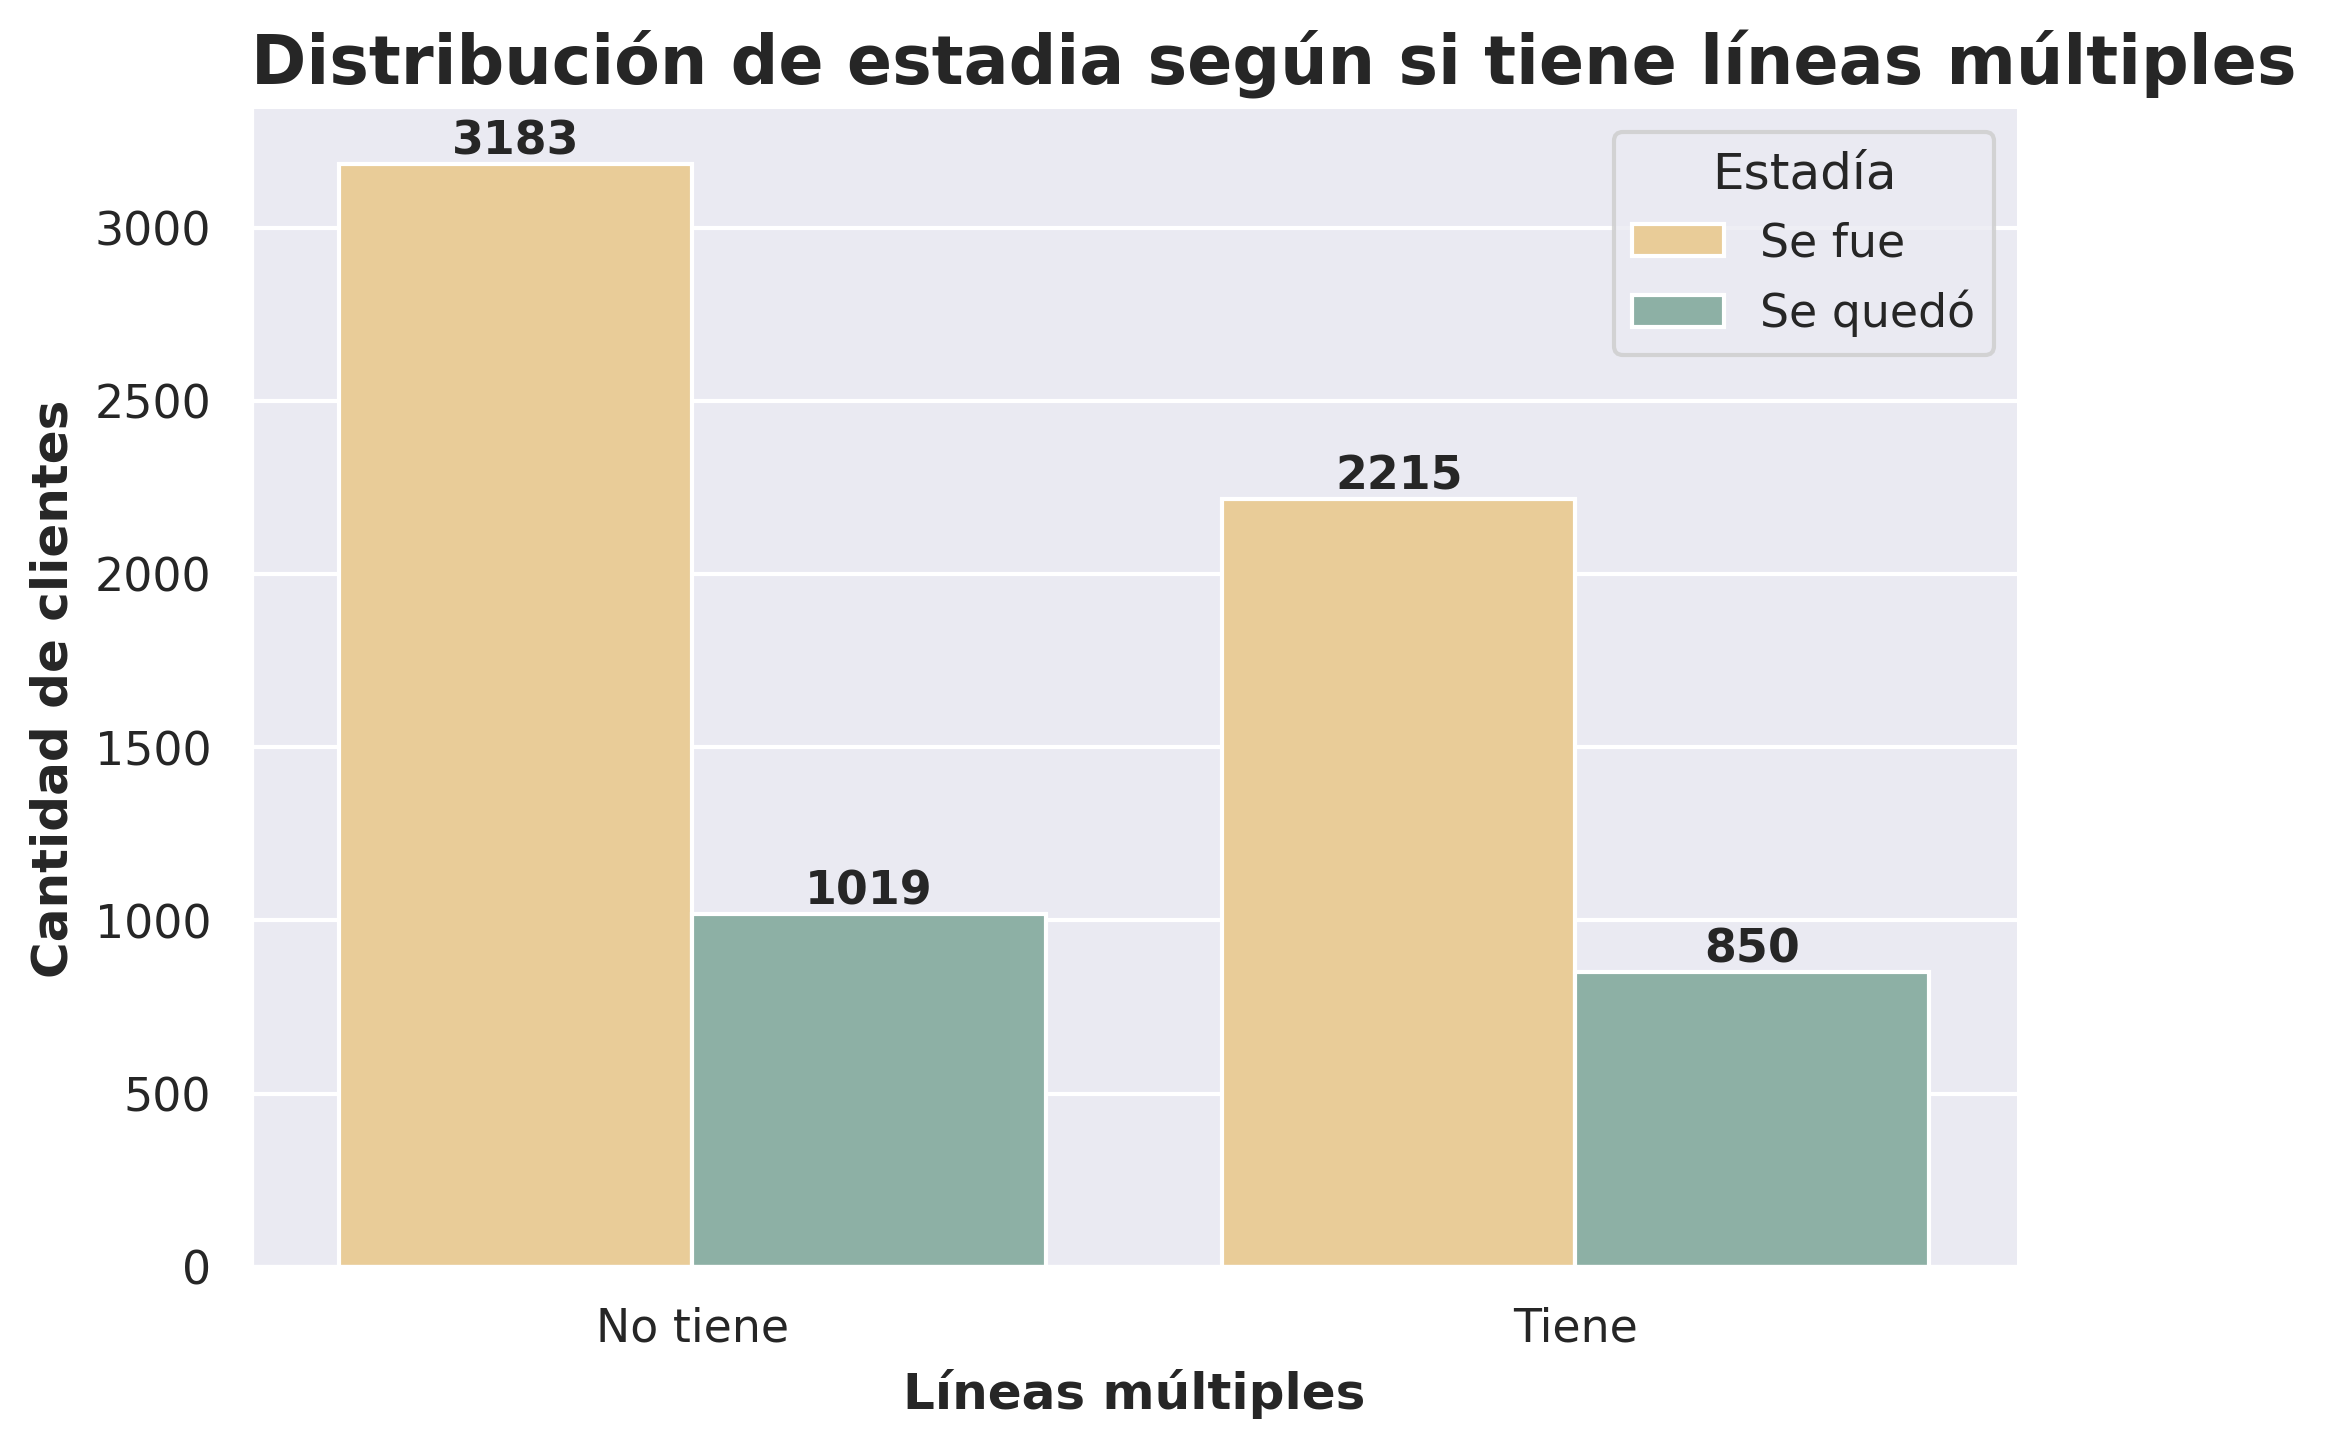

En esta gráfica podemoso observar que los que no tienen fueron los más se fueron, lo que puede implicar que nuestro servicio de múltiples líneas le resulta beneficioso para los que lo tienen, y puede deducirse que es una razón beneficiosa para quedarse.

#### **- Dependientes**

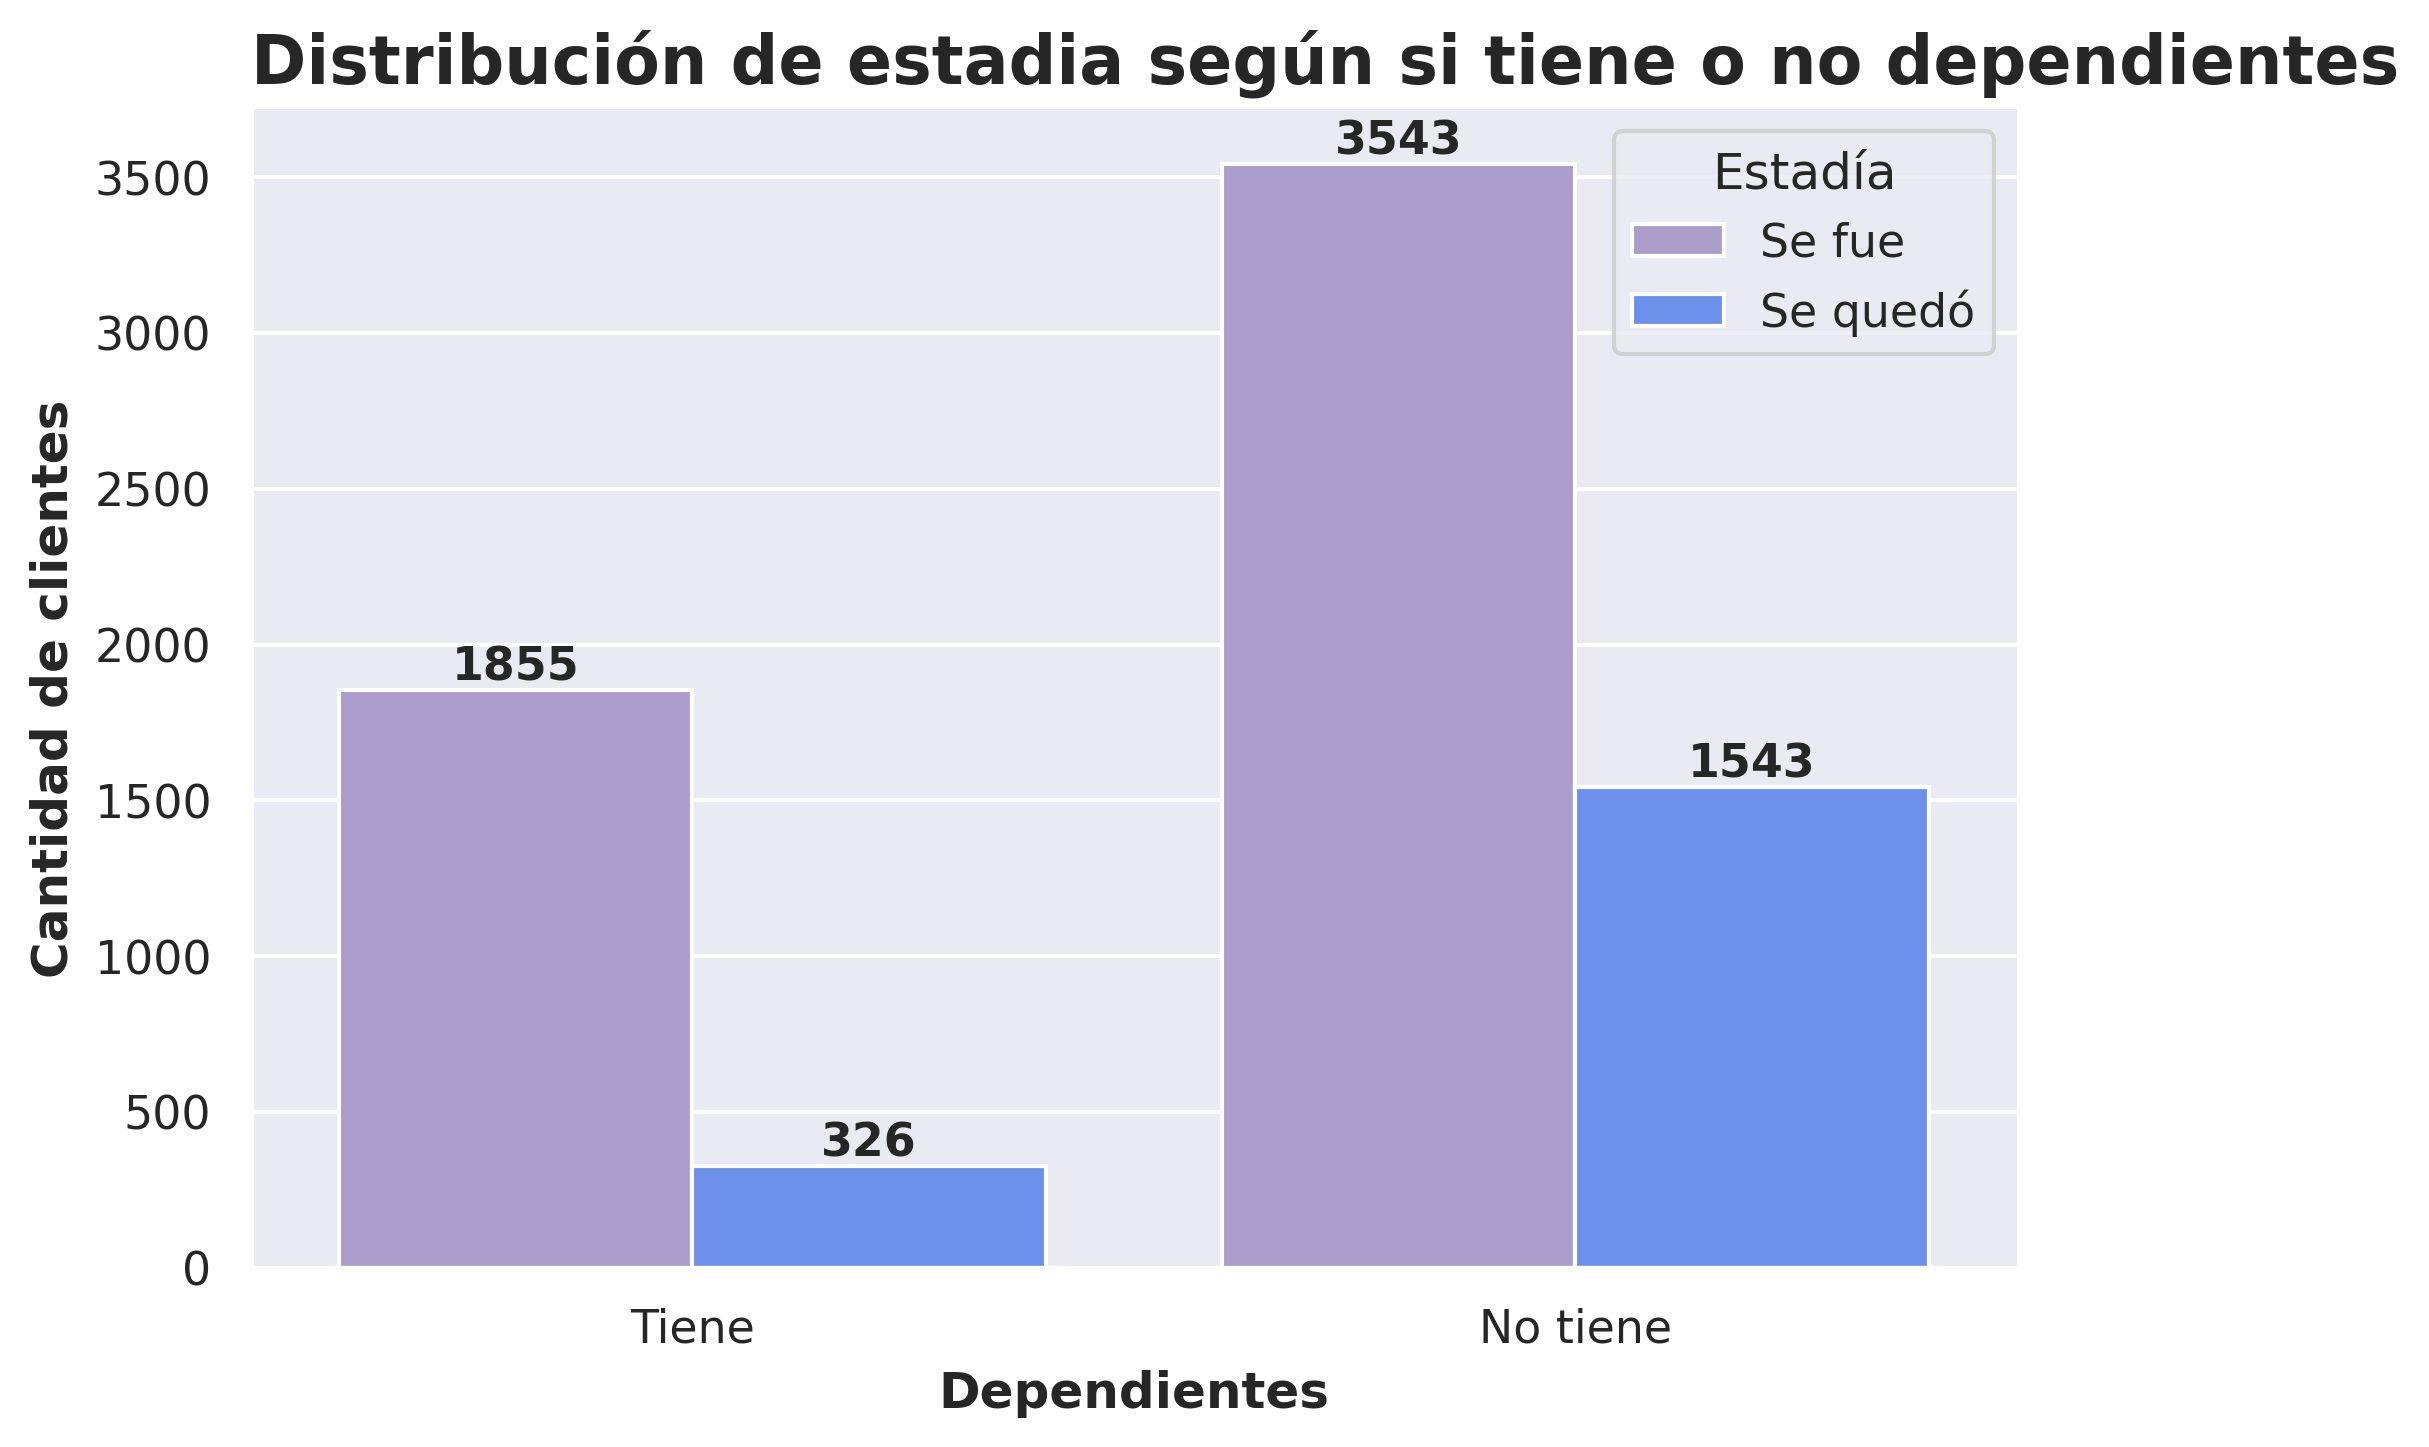

A simple vista en este gráfico puede parecer que los que tienen dependientes se fueron menos, pero comparando la lonitud de ambas barras podemos observar que los que no tienen dependientes fueron los que se quedaron más. A esto podemos intuir que consideran nuestro servicio como algo que no es de primera necesidad, por lo que deciden cancelarlo los que tienen dependientes.

Propongo crear estrategias que contengan servicios personalizados a los que tienen dependientes.

#### **- Tiempo en contrato**

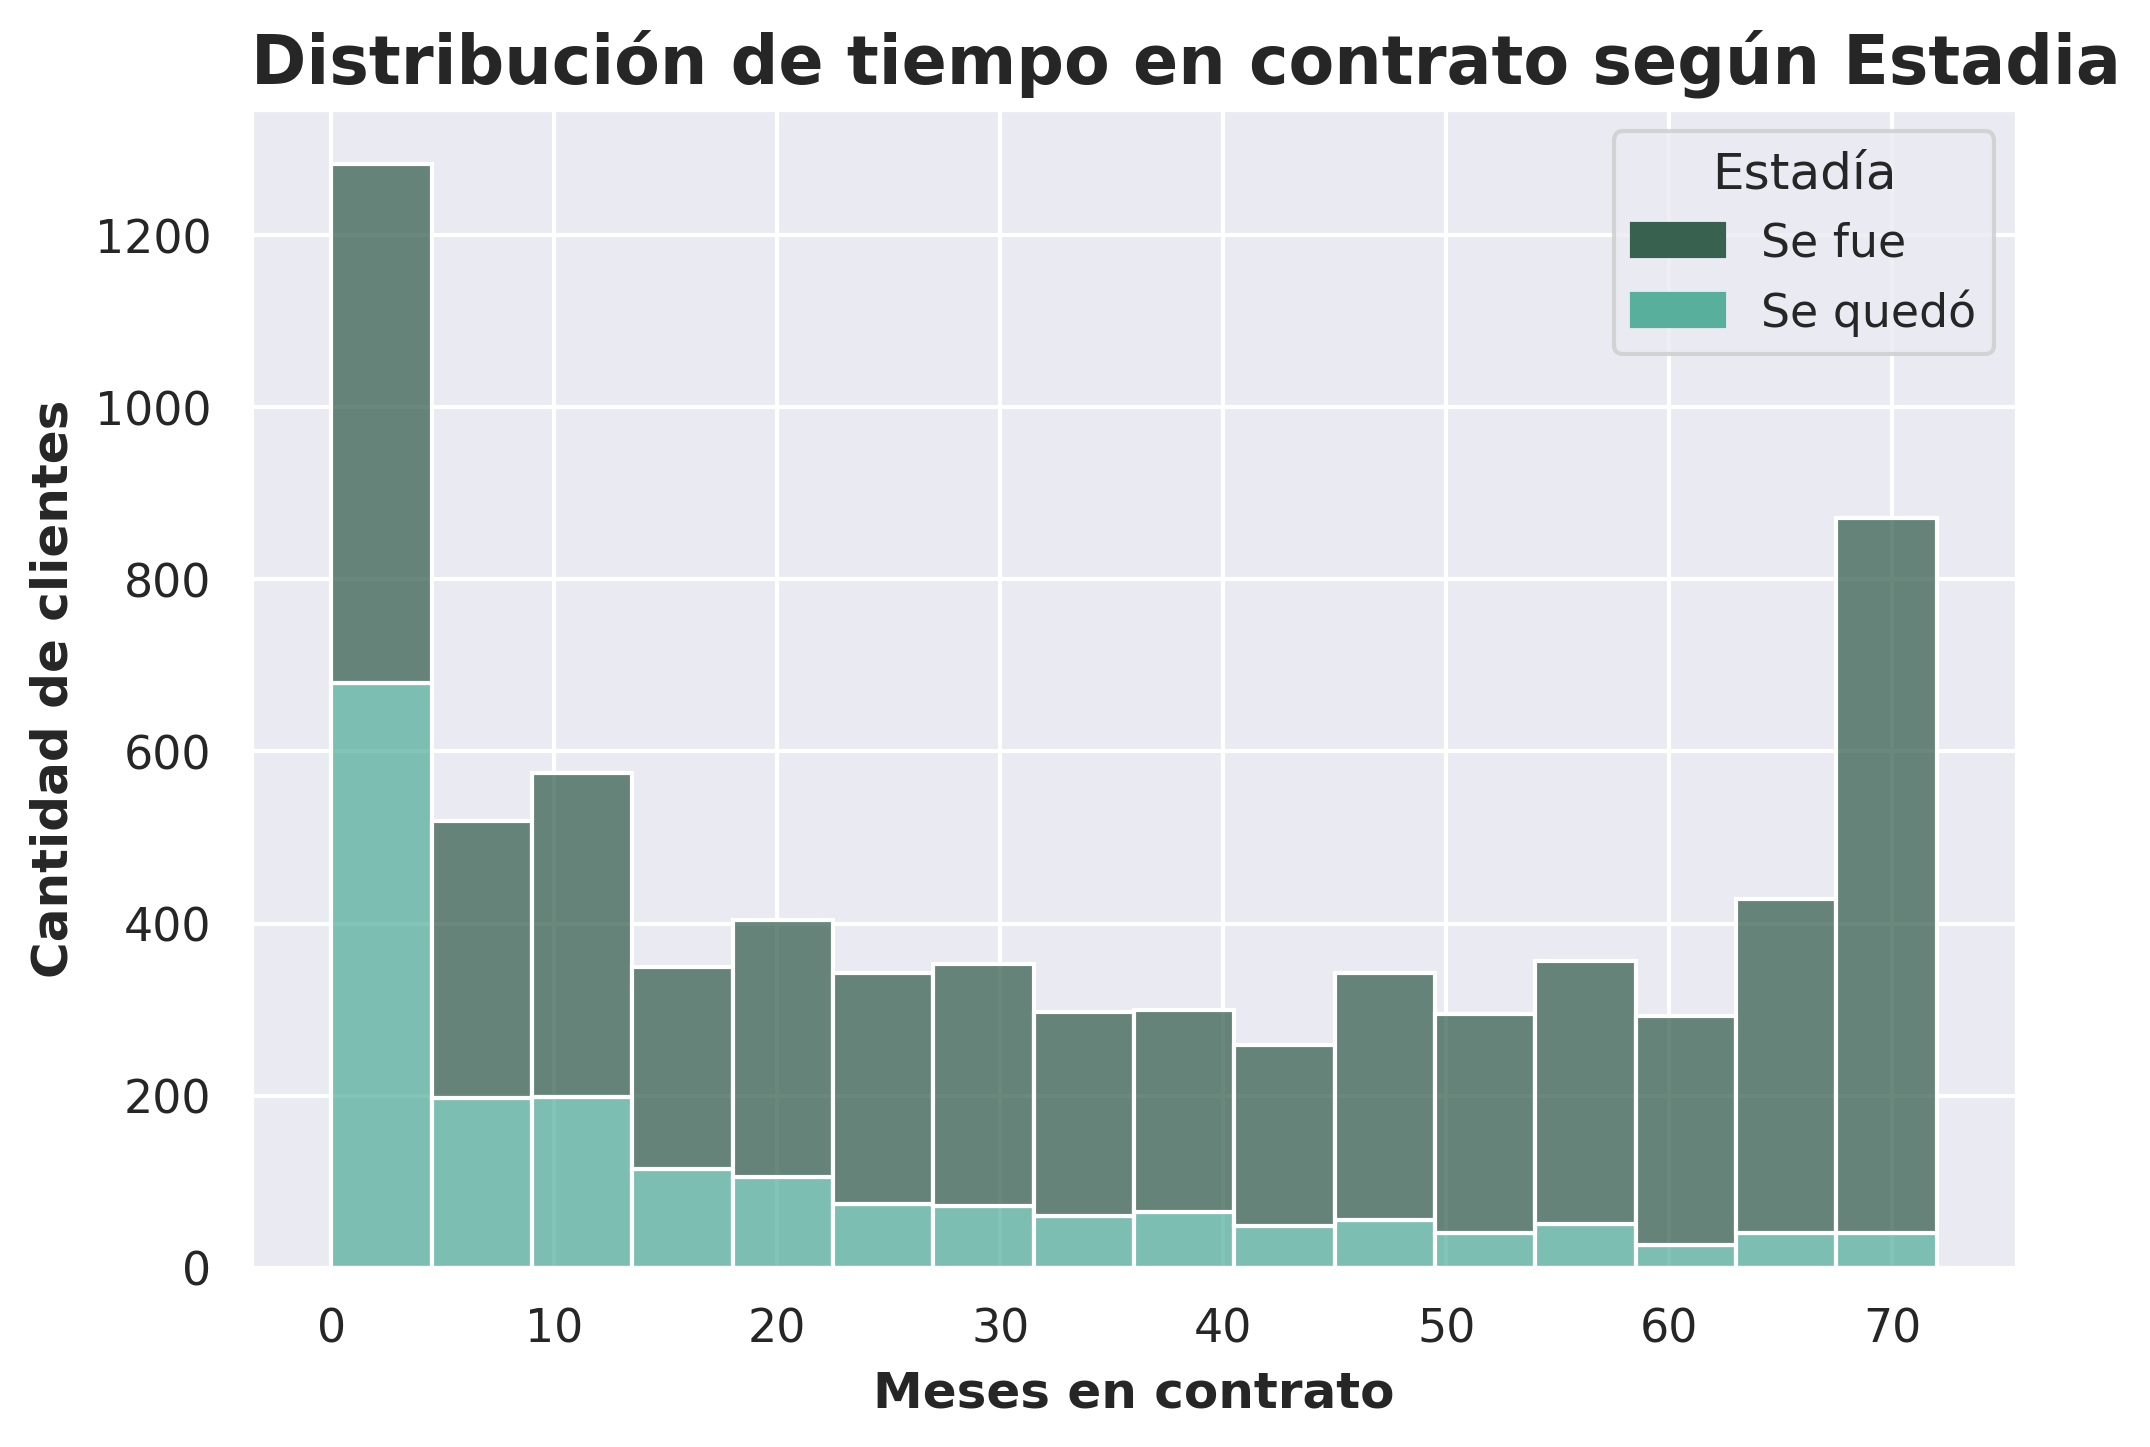

En este gráfico podemos analizar que los que más se quedaron también fueron de los que más se fueron, siendo los de tiempo más cortos, mientras que en definitiva los contratos que tienen mayor número de bajas son los de 70 meses, confirmando lo que vimos en la gráfica de tipo de contrato, que mientras más largo el periodo, es más probable que se vayan.

#### **- Gastos totales**

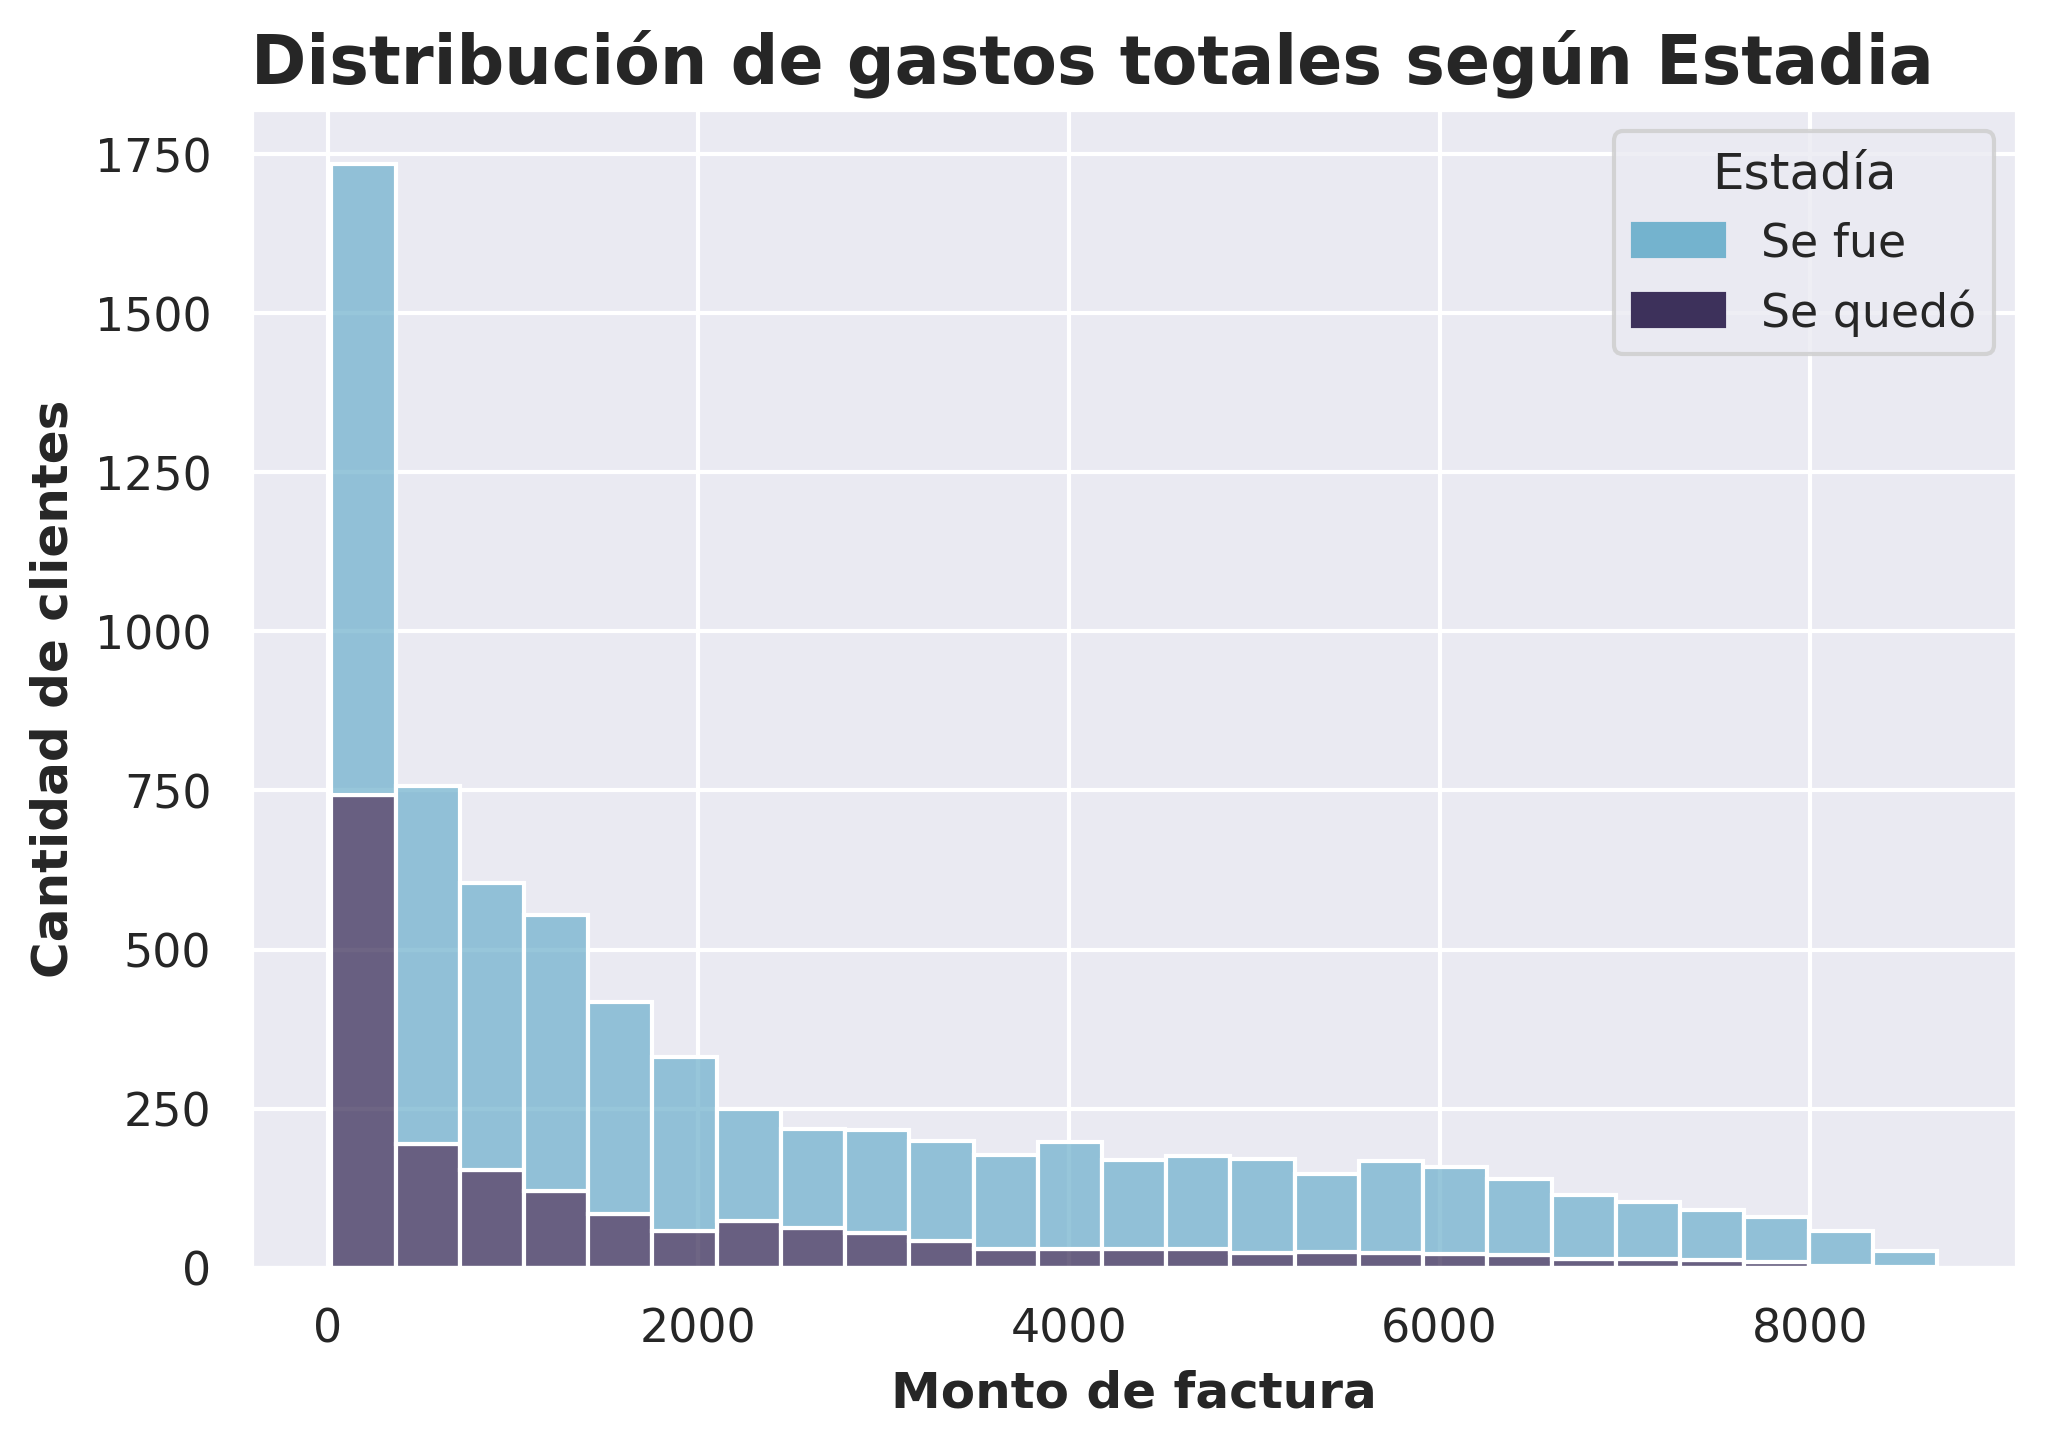

Finalmente enesta última gráfica podemos ver que los que tienen costos más bajos son los menos propensos a irse. En está gráfica las proporciones de irse son tan altas que no considero que se pueda hacer un análisis conforme cada rango de precios.

### **Correlación**

In [61]:
correlacion

,estadia_empresa
estadia_empresa,1.000000
adulto_mayor,0.146733
pareja,-0.148546
dependientes,-0.161384
meses_contrato,-0.344079
servicio_telefono,0.012571
lineas_multiples,0.039343
seguridad_linea,-0.166828
respaldo_linea,-0.080163
proteccion_adicional,-0.063452


Viendo las correlaciones podemos deducir que los que son más probables de quedarse son los que hacen facturación electronica y posteriormente los clientes que son adultos mayores. Mientras que los que son más probables de irse son los que tienen los servicios de seguridad adicional y de soporte técnico, en la decisión parece también influir los clientes que tienen pareja.

### Más servicios

In [62]:
correlacion_servicios

,total_servicios,estadia_empresa
total_servicios,1.000000,-0.064642
estadia_empresa,-0.064642,1.000000


Aquí podemos analizar que no a pesar de ser menor a cero, la relación no es lo suficientemente significativa para ver una línea clara entre las variables.

## **Conclusiones e Insights**

El análisis realizado sugiere que no existen diferencias de género lo suficientemente marcadas como para atribuirle un impacto decisivo en la evasión, lo cual puede interpretarse positivamente como una equidad en el servicio. No obstante, se detecta una ligera tendencia a que los hombres abandonen más la empresa. En cuanto a los tipos de contrato, se observa que los contratos mensuales no solo son los más comunes, sino también los que retienen más clientes, en contraste con los contratos anuales o bianuales, que tienden a presentar una mayor tasa de cancelación, posiblemente por su compromiso prolongado.

Respecto a la forma de pago, los usuarios que optan por facturación electrónica tienden a quedarse más, mientras que aquellos que usan métodos automáticos como tarjetas de crédito o transferencias bancarias, junto con quienes pagan por correo, presentan una mayor tasa de deserción. En términos de infraestructura, sorprendentemente, los clientes con fibra óptica muestran mayores tasas de abandono en comparación con quienes no tienen servicio o usan DSL, lo cual puede deberse a otros factores externos no visibles en este análisis.

El uso de múltiples líneas muestra una relación positiva con la retención de clientes, lo que indica que los usuarios que perciben mayor valor en el servicio tienden a mantenerse. En contraste, los clientes con dependientes tienen tasas más altas de abandono, lo que podría reflejar una necesidad de priorizar otros gastos o percepciones de que el servicio no es esencial.

El tiempo de contrato refuerza las conclusiones anteriores: los clientes con periodos contractuales más extensos (especialmente alrededor de los 70 meses) tienen una mayor propensión a dejar el servicio. Finalmente, los gastos totales también influyen: quienes tienen costos más bajos tienden a permanecer, aunque la dispersión en los datos hace difícil establecer una tendencia clara. En términos de correlación, destaca que la facturación electrónica y la edad (adulto mayor) se asocian positivamente con la permanencia, mientras que servicios adicionales como soporte técnico o seguridad, así como ciertas características personales como tener pareja, muestran correlación con la evasión.

## **Recomendaciones**

- Revisar y rediseñar los contratos largos, ofreciendo alternativas intermedias o dirigidas a perfiles específicos de clientes que se sientan cómodos con compromisos extendidos.

- Impulsar la facturación electrónica como medio principal, ya que está fuertemente relacionada con la retención de clientes.

- Realizar una investigación cualitativa sobre métodos de pago, especialmente aquellos con alta tasa de evasión, para ajustar estrategias de cobranza más alineadas a las preferencias del cliente.

- Evaluar la percepción del servicio de fibra óptica, dado que presenta una tasa inesperadamente alta de deserción.

- Promover el uso de múltiples líneas con estrategias comerciales que resalten sus beneficios, ya que está asociado a mayor retención.

- Desarrollar campañas orientadas a clientes con dependientes, personalizando servicios o beneficios que se ajusten a sus prioridades familiares.

- Seguir monitoreando los servicios adicionales (como soporte técnico y seguridad) para identificar si el problema está en la calidad, el costo, o en cómo se comunican sus beneficios.

- Evitar aumentos de precio desproporcionados, especialmente entre los usuarios con menor gasto, quienes parecen ser más leales.

- Segmentar las estrategias según edad y tipo de cliente, considerando que adultos mayores y quienes usan tecnología sencilla tienden a quedarse más.